In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

from datasets import load_dataset

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

from copy import deepcopy
import missingno as msno
import time

from StochasticGradientDescent import SGD
from ScaledConjugateGradient import SCG
from LeapFrog import LFrog
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from skopt import gp_minimize
from skopt.space import Real, Integer

from scipy.stats import shapiro
from scipy import stats
from scipy.stats import kruskal
import sys
from joblib import Parallel, delayed

## Linear function approximation:

$$y = -1.2x + 4.2 + e$$

In [361]:
def generate_linear_regression_data(n, scale=0.25, seed=0):
    np.random.seed(seed)
    x = np.random.uniform(-10, 10,(n,))
    err = np.random.normal(0.,scale, (n,))
    y = -1.2 * x + 4.5 + err

    mux = np.mean(x)
    muy = np.mean(y)
    sigx = np.std(x)
    sigy = np.std(y)
    x = (x-mux)/sigx
    y = (y-muy)/sigy
    return x,y

In [362]:
x,y = generate_linear_regression_data(10000)
x_val, y_val = generate_linear_regression_data(2000, seed=1)

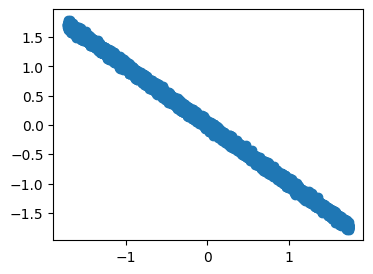

In [363]:
plt.figure(figsize=(4,3))
plt.scatter(x,y)
plt.show()

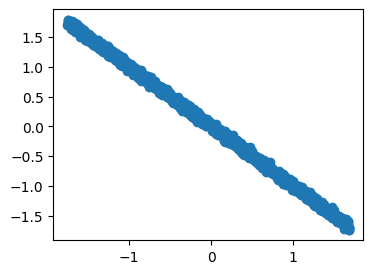

In [304]:
plt.figure(figsize=(4,3))
plt.scatter(x_val,y_val)
plt.show()

In [305]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
x_val = x_val.reshape(-1,1)
y_val = y_val.reshape(-1,1)

# Stochastic Gradient Descent

In [354]:
from StochasticGradientDescent import SGD

sgd = SGD(eta=0.01, alpha=0.1, num_hidden=256, epochs=100, output_activation='linear', random_state=0, debug=True, reg_parameter=0.05)
sgd.fit(x, y, x_val, y_val)

Epoch 1/100, Error: 0.7907362696907778, Avg Weight Change: 6.230441899218339e-05
Validation Error: 0.6051460903502834
Epoch 2/100, Error: 0.6113576189187028, Avg Weight Change: 5.223266342441203e-05
Validation Error: 0.6031335923211344
Epoch 3/100, Error: 0.6113518034812657, Avg Weight Change: 5.2145612712198553e-05
Validation Error: 0.6051159885096892
Epoch 4/100, Error: 0.6113080277912785, Avg Weight Change: 5.239461197638476e-05
Validation Error: 0.6071984726338528
Epoch 5/100, Error: 0.6113632840105359, Avg Weight Change: 5.2352540238789227e-05
Validation Error: 0.6043834009367868
Epoch 6/100, Error: 0.6113174643642783, Avg Weight Change: 5.223011563934311e-05
Validation Error: 0.6050469658272005
Epoch 7/100, Error: 0.6113066736178923, Avg Weight Change: 5.228706596908147e-05
Validation Error: 0.6044455414308492
Epoch 8/100, Error: 0.6112760836716812, Avg Weight Change: 5.2239782131881476e-05
Validation Error: 0.6057922171199646
Early stopping at epoch 8 due to overfitting detected

In [355]:
xseq = np.linspace(x.min()-1e-02, x.max()+1e-02, 100)
yseq = sgd.predict(xseq.reshape(-1,1))

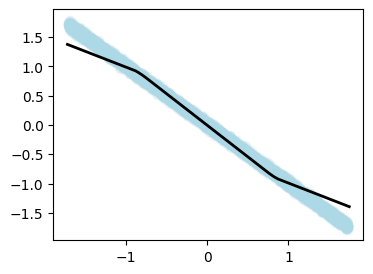

In [356]:
plt.figure(figsize=(4,3))
plt.scatter(x,y,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

In [352]:
sgd.score(x_val,y_val)

0.024890805803068638

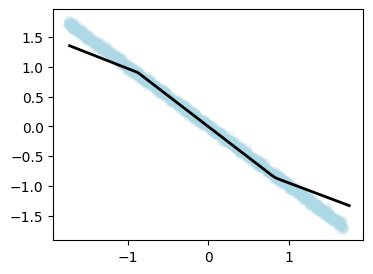

In [353]:
plt.figure(figsize=(4,3))
plt.scatter(x_val,y_val,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

## Scaled Conjugate Gradient

In [310]:
from ScaledConjugateGradient import SCG

scg = SCG(num_hidden=256, output_activation='linear', random_state=0, debug=True, reg_parameter=0.01)
scg.fit(x, y, x, y)

Training error is: 0.545407268493551 and validation error is: 0.545407268493551
Training error is: 0.5402012171360266 and validation error is: 0.5402012171360266
Training error is: 0.5394726540192014 and validation error is: 0.5394726540192014


In [311]:
xseq = np.linspace(x.min()-1e-02, x.max()+1e-02, 100)
yseq = scg.predict(xseq.reshape(-1,1))

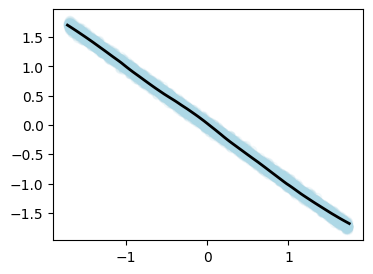

In [312]:
plt.figure(figsize=(4,3))
plt.scatter(x,y,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

## Leap Frog

In [313]:
from LeapFrog import LFrog

lf = LFrog(num_hidden=256, output_activation='linear', random_state=0, debug=True, num_batches=64, reg_parameter=0.00001)
lf.fit(x, y, x_val, y_val)

Training error is: 0.9897734213174754 and validation error is: 0.9880044237538871
Training error is: 0.9145337618148253 and validation error is: 0.9108155153812382
Training error is: 0.7545906002948973 and validation error is: 0.7486403816137976
Training error is: 0.5997981629193123 and validation error is: 0.5914720160140633
Training error is: 0.542696459733804 and validation error is: 0.5360584970360536
Training error is: 0.5440814436084073 and validation error is: 0.5372580504926462
Training error is: 0.5468287259333161 and validation error is: 0.5398503413631252
Training error is: 0.5482215949853787 and validation error is: 0.5411352806658727
Training error is: 0.5464912318244695 and validation error is: 0.5395150952108363
Training error is: 0.5438229356399011 and validation error is: 0.5369824509677141
Training error is: 0.5414717900389314 and validation error is: 0.5347597361164137
Training error is: 0.540794852884018 and validation error is: 0.5341269510314746
Training error is:

In [314]:
xseq = np.linspace(x.min()-1e-02, x.max()+1e-02, 100)
yseq = lf.predict(xseq.reshape(-1,1))

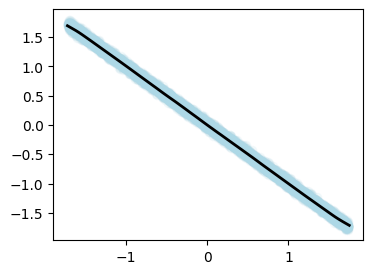

In [315]:
plt.figure(figsize=(4,3))
plt.scatter(x,y,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

In [64]:
lf.score(x_val,y_val)

0.020521332928793296

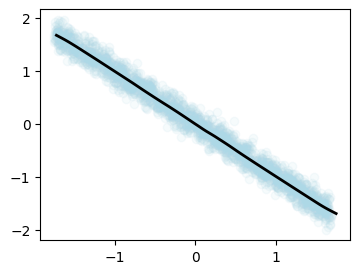

In [65]:
plt.figure(figsize=(4,3))
plt.scatter(x_val,y_val,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

# Perform hyperparameter tuning

## Stochastic Gradient Descent

In [369]:
def reshape_data(x, y):
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    return x, y

def process_fold(n, params):
    eta, alpha, reg_parameter, num_epochs, num_hidden, bias_parameter = params
    model = SGD(eta=eta, alpha=alpha, epochs=num_epochs, num_hidden=num_hidden, 
                reg_parameter=reg_parameter, output_activation='linear', bias=bias_parameter)
    
    x_train, y_train = generate_linear_regression_data(10000, seed=n)
    x_val, y_val = generate_linear_regression_data(2000, seed=n+5)
    x_test, y_test = generate_linear_regression_data(2000, seed=n+10)
    x_train, y_train = reshape_data(x_train, y_train)
    x_val, y_val = reshape_data(x_val, y_val)
    x_test, y_test = reshape_data(x_test, y_test)
    
    model.random_state = n
    model.validation_error = []
    model.training_error = []
    model.fit(x_train, y_train, x_val, y_val)
    score = model.score(x_test, y_test)
    
    return score

def cross_validate(params, n_splits=5):
    scores = Parallel(n_jobs=5)(
        delayed(process_fold)(n, params) for n in range(n_splits)
    )
    return np.mean(scores)

# Define the objective function to minimize (validation error)
def objective(params):
    params_list = list(params)
    print(f"Testing parameters: {params_list}", end='\r')
    sys.stdout.flush()
    
    # Perform cross-validation
    cv_score = cross_validate(params_list)
    
    return cv_score  # Return mean cross-validation error

# Define the hyperparameter search space
search_space = [
    Real(1e-4, 1e-2, "log-uniform", name='eta'),
    Real(0, 0.99, "uniform", name='alpha'),
    Real(1e-4, 1, "uniform", name='reg_parameter'),
    Integer(10, 100, name='num_epochs'),
    Integer(1, 512, name='num_hidden'),
    Real(-1, 1, name='bias_parameter')
]

# Run Bayesian optimization
result = gp_minimize(
    objective,
    search_space,
    n_calls=100,
    n_initial_points=20,
    random_state=0,
    n_jobs=1,  # Keep this at 1 as we're parallelizing inside the objective function
    verbose=True
)

# Print the best hyperparameters found
print("\nBest hyperparameters found:")
print(f"Learning rate (eta): {result.x[0]}")
print(f"Momentum (alpha): {result.x[1]}")
print(f"Regularization (lambda): {result.x[2]}")
print(f"Number of epochs: {result.x[3]}")
print(f"Number of hidden units: {result.x[4]}")
print(f"Bias value: {result.x[5]}")

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.0952074, 0.8579598230609947, 86, 320, -0.23123658541460013]
Time taken: 4.3225
Function value obtained: 1.0000
Current minimum: 1.0000
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.754426876, 0.27272902895065526, 53, 416, -0.040045655249885126]
Time taken: 20.8880
Function value obtained: 0.2986
Current minimum: 0.2986
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.902004, 0.3374624208012267, 68, 189, 0.9143103179060932]
Time taken: 28.9978
Function value obtained: 0.2991
Current minimum: 0.2986
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.57748523, 0.4736606844691832, 82, 267, 0.3577590602379208]
Time taken: 48.4975
Function value obtained: 0.7956
Current minim

In [370]:
x_train, y_train = generate_linear_regression_data(10000, seed=100)
x_val, y_val = generate_linear_regression_data(2000, seed=101)
x_test, y_test = generate_linear_regression_data(2000, seed=102)
x_train, y_train = reshape_data(x_train, y_train)
x_val, y_val = reshape_data(x_val, y_val)
x_test, y_test = reshape_data(x_test, y_test)

In [371]:
best_linear_sgd_model = SGD(eta=result.x[0], alpha=result.x[1], reg_parameter=result.x[2], num_hidden=result.x[4], output_activation='linear', epochs=result.x[3], random_state=0, bias=result.x[5])
best_linear_sgd_model.fit(x_train, y_train, x_val, y_val)

In [372]:
best_linear_sgd_model.score(x_test, y_test)

0.001212606020094486

In [374]:
best_linear_sgd_model.score(x_train, y_train)

0.0013190803763898573

In [373]:
best_linear_sgd_model.score(x_val, y_val)

0.001439561851209772

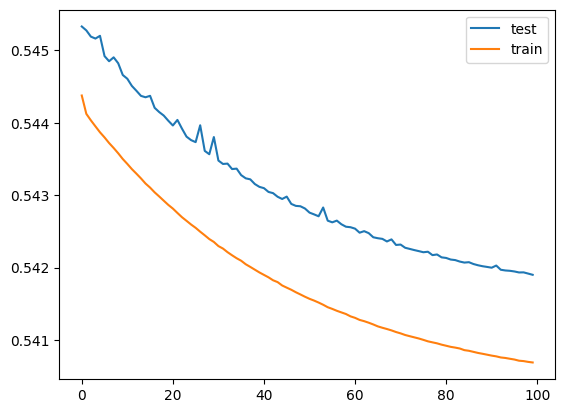

In [375]:
plt.figure()

plt.plot(np.asarray(best_linear_sgd_model.validation_error))
plt.plot(np.asarray(best_linear_sgd_model.training_error))

plt.legend(['test', 'train'])
plt.show()

In [388]:
xseq = np.linspace(x_test.min()-1e-02, x_test.max()+1e-02, 100)
yseq = best_linear_sgd_model.predict(xseq.reshape(-1,1))

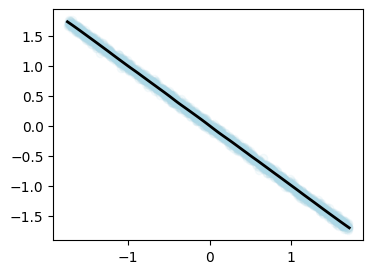

In [389]:
plt.figure(figsize=(4,3))
plt.scatter(x_test,y_test,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

## Scaled Conjugate Gradient

In [379]:
def reshape_data(x, y):
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    return x, y

def process_fold(n, params):
    reg_parameter, num_epochs, num_hidden, bias_parameter = params
    model = SCG(epochs=num_epochs, num_hidden=num_hidden, reg_parameter=reg_parameter, output_activation='linear', bias=bias_parameter)
    
    x_train, y_train = generate_linear_regression_data(10000, seed=n)
    x_val, y_val = generate_linear_regression_data(2000, seed=n+5)
    x_test, y_test = generate_linear_regression_data(2000, seed=n+10)
    x_train, y_train = reshape_data(x_train, y_train)
    x_val, y_val = reshape_data(x_val, y_val)
    x_test, y_test = reshape_data(x_test, y_test)
    
    model.random_state = n
    model.validation_error = []
    model.training_error = []
    model.fit(x_train, y_train, x_val, y_val)
    score = model.score(x_test, y_test)
    
    return score

def cross_validate(params, n_splits=5):
    scores = Parallel(n_jobs=5)(
        delayed(process_fold)(n, params) for n in range(n_splits)
    )
    print(scores)
    return np.mean(scores)

# Define the objective function to minimize (validation error)
def objective(params):
    params_list = list(params)
    print(f"Testing parameters: {params_list}", end='\r')
    sys.stdout.flush()
    
    # Perform cross-validation
    cv_score = cross_validate(params_list)
    
    return cv_score

# Define the hyperparameter search space
search_space = [
    Real(1e-4, 1e-1, "uniform", name='reg_parameter'),
    Integer(100, 1000, name='num_epochs'),
    Integer(1, 512, name='num_hidden'),
    Real(-1, 1, name='bias_parameter')
]

# Run Bayesian optimization
result = gp_minimize(
    objective,
    search_space,
    n_calls=100,
    n_initial_points=20,
    random_state=0,
    n_jobs=1,
    verbose=True
)

# Print the best hyperparameters found
print("\nBest hyperparameters found:")
print(f"Regularization (lambda): {result.x[0]}")
print(f"Number of epochs: {result.x[1]}")
print(f"Number of hidden units: {result.x[2]}")
print(f"Bias value: {result.x[3]}")

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.945034775682513]
Time taken: 25.8319
Function value obtained: 0.9294
Current minimum: 0.9294
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.8865740453651136]
Time taken: 7.5431
Function value obtained: 0.8963
Current minimum: 0.8963
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point..040045655249885126]
Time taken: 25.7395
Function value obtained: 0.8632
Current minimum: 0.8632
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.963437441023946]
Time taken: 7.9594
Function value obtained: 0.8661
Current minimum: 0.8632
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.01745167168732]
Time taken: 3.3190
Funct

In [380]:
x_train, y_train = generate_linear_regression_data(10000, seed=100)
x_val, y_val = generate_linear_regression_data(2000, seed=101)
x_test, y_test = generate_linear_regression_data(2000, seed=102)
x_train, y_train = reshape_data(x_train, y_train)
x_val, y_val = reshape_data(x_val, y_val)
x_test, y_test = reshape_data(x_test, y_test)

In [381]:
best_linear_scg_model = SCG(epochs=result.x[1], num_hidden=result.x[2], reg_parameter=result.x[0], output_activation='linear', random_state=0, bias=result.x[3])
best_linear_scg_model.fit(x_train, y_train, x_val, y_val)

In [382]:
best_linear_scg_model.score(x_test, y_test)

0.0014893633453696147

In [383]:
best_linear_scg_model.score(x_train, y_train)

0.0016324851465521206

In [384]:
best_linear_scg_model.score(x_val, y_val)

0.0017634278416389976

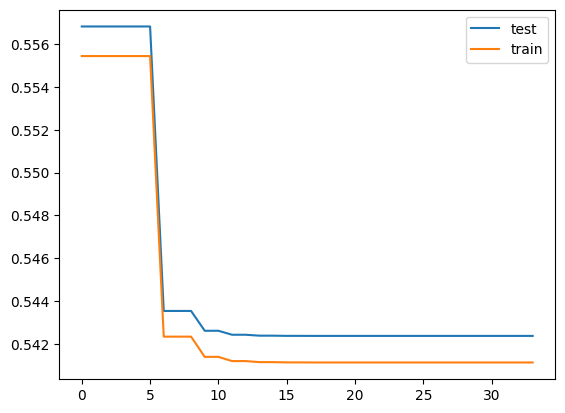

In [385]:
plt.figure()

plt.plot(np.asarray(best_linear_scg_model.validation_error))
plt.plot(np.asarray(best_linear_scg_model.training_error))

plt.legend(['test', 'train'])
plt.show()

In [386]:
xseq = np.linspace(x_test.min()-1e-02, x_test.max()+1e-02, 100)
yseq = best_linear_scg_model.predict(xseq.reshape(-1,1))

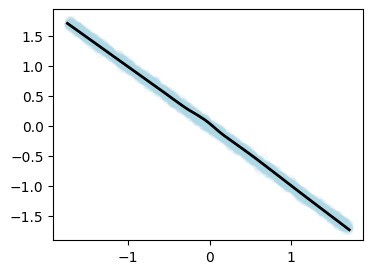

In [387]:
plt.figure(figsize=(4,3))
plt.scatter(x_test,y_test,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

## Leap Frog

In [390]:
def reshape_data(x, y):
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    return x, y

def process_fold(n, params):
    reg_parameter, num_epochs, num_hidden, bias_parameter, num_batches = params
    model = LFrog(epochs=num_epochs, num_hidden=num_hidden, reg_parameter=reg_parameter, output_activation='linear', bias=bias_parameter, num_batches=num_batches)
    
    x_train, y_train = generate_linear_regression_data(10000, seed=n)
    x_val, y_val = generate_linear_regression_data(2000, seed=n+5)
    x_test, y_test = generate_linear_regression_data(2000, seed=n+10)
    x_train, y_train = reshape_data(x_train, y_train)
    x_val, y_val = reshape_data(x_val, y_val)
    x_test, y_test = reshape_data(x_test, y_test)
    
    model.random_state = n
    model.validation_error = []
    model.training_error = []
    model.fit(x_train, y_train, x_val, y_val)
    score = model.score(x_test, y_test)
    
    return score

def cross_validate(params, n_splits=5):
    scores = Parallel(n_jobs=5)(
        delayed(process_fold)(n, params) for n in range(n_splits)
    )
    return np.mean(scores)

# Define the objective function to minimize (validation error)
def objective(params):
    params_list = list(params)
    print(f"Testing parameters: {params_list}", end='\r')
    sys.stdout.flush()
    
    # Perform cross-validation
    cv_score = cross_validate(params_list)
    
    return cv_score  # Return mean cross-validation error

# Define the hyperparameter search space
search_space = [
    Real(1e-4, 1e-1, "uniform", name='reg_parameter'),
    Integer(100, 1000, name='num_epochs'),
    Integer(1, 512, name='num_hidden'),
    Real(-1, 1, name='bias_parameter'),
    Integer(1, 128, name='num_batches')
]

# Run Bayesian optimization
result = gp_minimize(
    objective,
    search_space,
    n_calls=100,
    n_initial_points=20,
    random_state=0,
    n_jobs=1,  # Keep this at 1 as we're parallelizing inside the objective function
    verbose=True
)

# Print the best hyperparameters found
print("\nBest hyperparameters found:")
print(f"Regularization (lambda): {result.x[0]}")
print(f"Number of epochs: {result.x[1]}")
print(f"Number of hidden units: {result.x[2]}")
print(f"Bias value: {result.x[3]}")
print(f"Number of batches units: {result.x[4]}")

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.945034775682513, 80]
Time taken: 26.6930
Function value obtained: 1.0000
Current minimum: 1.0000
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.546874108397735, 62]
Time taken: 0.5167
Function value obtained: 0.7377
Current minimum: 0.7377
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.21575270747555, 44]
Time taken: 10.2625
Function value obtained: 1.0000
Current minimum: 0.7377
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.7192984391747097, 112]
Time taken: 28.9579
Function value obtained: 1.0000
Current minimum: 0.7377
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.3577590602379208, 93]
Time 

In [391]:
x_train, y_train = generate_linear_regression_data(10000, seed=100)
x_val, y_val = generate_linear_regression_data(2000, seed=101)
x_test, y_test = generate_linear_regression_data(2000, seed=102)
x_train, y_train = reshape_data(x_train, y_train)
x_val, y_val = reshape_data(x_val, y_val)
x_test, y_test = reshape_data(x_test, y_test)

In [392]:
best_linear_lf_model = LFrog(epochs=result.x[1], num_hidden=result.x[2], reg_parameter=result.x[0], output_activation='linear', random_state=0, bias=result.x[3], num_batches=result.x[4])
best_linear_lf_model.fit(x_train, y_train, x_val, y_val)

In [393]:
best_linear_lf_model.score(x_test, y_test)

0.0011808279417635631

In [394]:
best_linear_lf_model.score(x_train, y_train)

0.0012949050097235538

In [395]:
best_linear_lf_model.score(x_val, y_val)

0.0014084880235704829

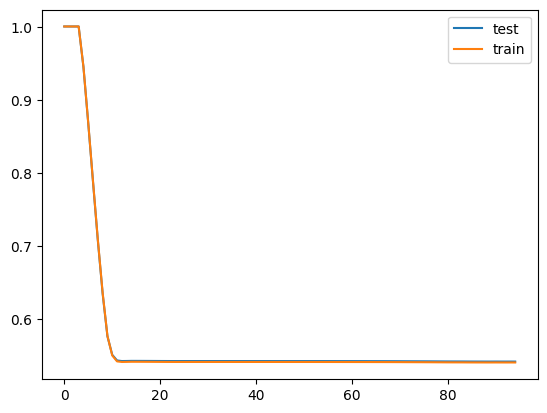

In [396]:
plt.figure()

plt.plot(np.asarray(best_linear_lf_model.validation_error))
plt.plot(np.asarray(best_linear_lf_model.training_error))

plt.legend(['test', 'train'])
plt.show()

In [397]:
xseq = np.linspace(x_test.min()-1e-02, x_test.max()+1e-02, 100)
yseq = best_linear_lf_model.predict(xseq.reshape(-1,1))

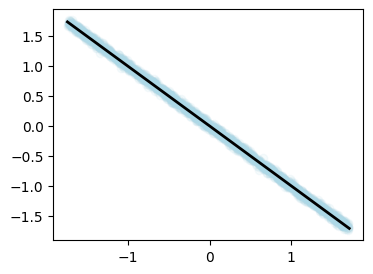

In [398]:
plt.figure(figsize=(4,3))
plt.scatter(x_test,y_test,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

# Compare the 3 types of models against one another

In [400]:
import time
import numpy as np
from joblib import Parallel, delayed
import sys

def reshape_data(x, y):
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    return x, y

def process_fold(n, model, name):
    start_time = time.time()
    
    x_train, y_train = generate_linear_regression_data(10000, seed=n+20)
    x_val, y_val = generate_linear_regression_data(2000, seed=n+25)
    x_test, y_test = generate_linear_regression_data(2000, seed=n+30)
    x_train, y_train = reshape_data(x_train, y_train)
    x_val, y_val = reshape_data(x_val, y_val)
    x_test, y_test = reshape_data(x_test, y_test)
    
    # Update model's random state
    model.random_state = n + 10
    
    # Reset model's internal state
    model.validation_error = []
    model.training_error = []
    
    # Fit the model
    model.fit(x_train, y_train, x_val, y_val)
    
    # Calculate the score
    score = model.score(x_test, y_test)
    
    # Calculate the elapsed time
    elapsed_time = time.time() - start_time
    
    # Update progress
    sys.stdout.write(f'\rProcessing {name}: Fold {n+1}/10 completed')
    sys.stdout.flush()
    
    return score, elapsed_time

def cross_validate(model, name, n_splits=10):
    results = Parallel(n_jobs=5)(
        delayed(process_fold)(n, model, name) 
        for n in range(n_splits)
    )
    scores, times = zip(*results)
    return list(scores), list(times)

# Define models and their names
models = [best_linear_sgd_model, best_linear_scg_model, best_linear_lf_model]
model_names = ['Stochastic Gradient Descent', 'Scaled Conjugate Gradient', 'Leap Frog Optimiser']

model_cv_scores = []
model_cv_times = []

for model, name in zip(models, model_names):
    print(f"\nCross-validating {name}:")
    scores, times = cross_validate(model, name)
    model_cv_scores.append(scores)
    model_cv_times.append(times)
    
    # Clear the progress line
    sys.stdout.write('\r' + ' ' * 50 + '\r')
    sys.stdout.flush()
    
    print(f"Completed cross-validation for {name}")
    print(f"Mean score: {np.mean(scores):.4f} ± {np.std(scores):.4f}")
    print(f"Mean time: {np.mean(times):.2f}s ± {np.std(times):.2f}s")

# Print overall results
print("\nOverall Results:")
for name, scores, times in zip(model_names, model_cv_scores, model_cv_times):
    print(f"{name}:")
    print(f"  Mean score: {np.mean(scores):.4f} ± {np.std(scores):.4f}")
    print(f"  Mean time: {np.mean(times):.2f}s ± {np.std(times):.2f}s")


Cross-validating Stochastic Gradient Descent:
Completed cross-validation for Stochastic Gradient Descent
Mean score: 0.0013 ± 0.0000
Mean time: 211.63s ± 65.69s

Cross-validating Scaled Conjugate Gradient:
Completed cross-validation for Scaled Conjugate Gradient
Mean score: 0.0415 ± 0.0504
Mean time: 4.42s ± 0.31s

Cross-validating Leap Frog Optimiser:
Completed cross-validation for Leap Frog Optimiser
Mean score: 0.0108 ± 0.0283
Mean time: 2.91s ± 0.58s

Overall Results:
Stochastic Gradient Descent:
  Mean score: 0.0013 ± 0.0000
  Mean time: 211.63s ± 65.69s
Scaled Conjugate Gradient:
  Mean score: 0.0415 ± 0.0504
  Mean time: 4.42s ± 0.31s
Leap Frog Optimiser:
  Mean score: 0.0108 ± 0.0283
  Mean time: 2.91s ± 0.58s


In [434]:
stat, p_value = shapiro(model_cv_scores)

print(f'Statistic={stat}, p-value={p_value}')
if p_value > 0.05:
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")

Statistic=0.5065440113252753, p-value=6.28785788069801e-09
Data is not normally distributed



Best model (Stochastic Gradient Descent) mean squared error: 0.0014


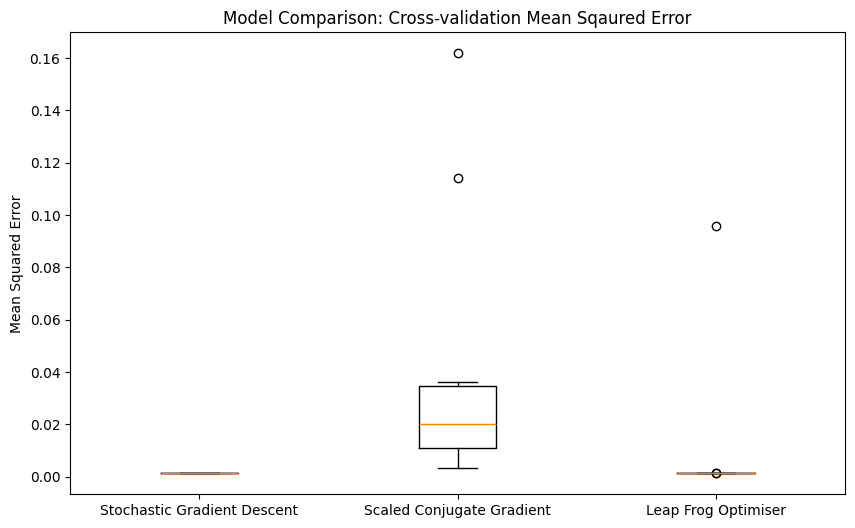

In [435]:
x_train, y_train = generate_linear_regression_data(10000, seed=1000)
x_val, y_val = generate_linear_regression_data(2000, seed=1001)
x_test, y_test = generate_linear_regression_data(2000, seed=1002)
x_train, y_train = reshape_data(x_train, y_train)
x_val, y_val = reshape_data(x_val, y_val)
x_test, y_test = reshape_data(x_test, y_test)

# Train the best model on the entire training set and evaluate on the test set
best_model_index = np.argmin([np.mean(scores) for scores in model_cv_scores])
best_model = models[best_model_index]
best_model.fit(x_train, y_train, x_val, y_val)
test_accuracy = best_model.score(x_test, y_test)
print(f"\nBest model ({model_names[best_model_index]}) mean squared error: {test_accuracy:.4f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.boxplot(model_cv_scores, labels=model_names)
plt.title('Model Comparison: Cross-validation Mean Sqaured Error')
plt.ylabel('Mean Squared Error')
plt.show()

In [436]:
stat, p_value = kruskal(*model_cv_scores)
print(f"Statistic: {stat}, p-value: {p_value}")

Statistic: 18.40516129032258, p-value: 0.00010077899115195202


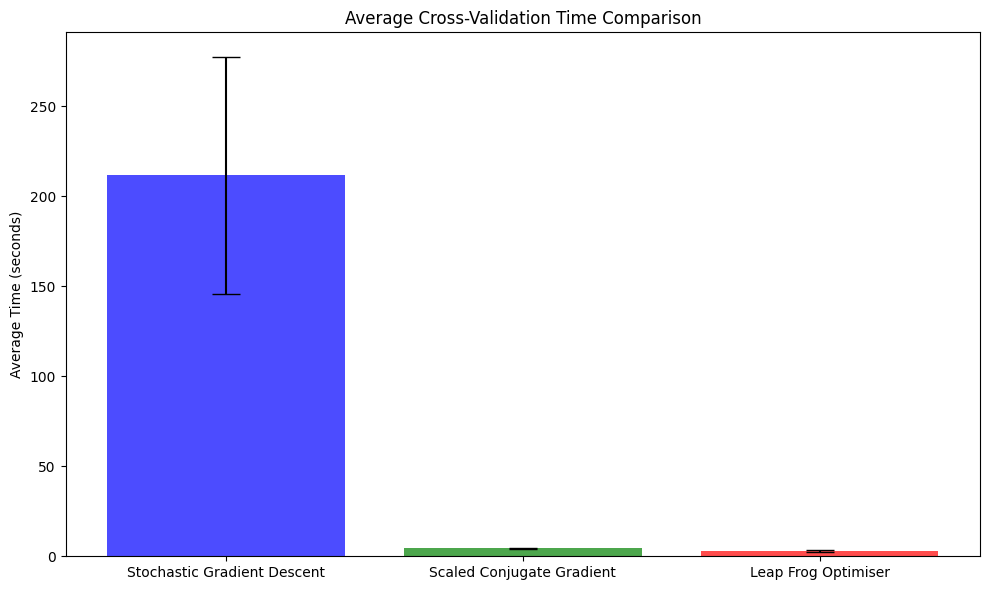

In [437]:
mean_times = [np.mean(times) for times in model_cv_times]
std_times = [np.std(times) for times in model_cv_times]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
x_pos = np.arange(len(model_names))

ax.bar(x_pos, mean_times, yerr=std_times, align='center', alpha=0.7, capsize=10, color=['blue', 'green', 'red'])
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names)
ax.set_ylabel('Average Time (seconds)')
ax.set_title('Average Cross-Validation Time Comparison')
# ax.yaxis.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [438]:
stat, p_value = kruskal(*model_cv_times)
print(f"Statistic: {stat}, p-value: {p_value}")

Statistic: 25.812194036493107, p-value: 2.482866004030669e-06


In [440]:
import numpy as np
from scipy import stats

def perform_paired_ttests(model_cv_scores, model_names):
    n_models = len(model_names)
    results = []

    for i in range(n_models):
        for j in range(i+1, n_models):
            t_statistic, p_value = stats.ttest_rel(model_cv_scores[i], model_cv_scores[j])
            results.append({
                'model1': model_names[i],
                'model2': model_names[j],
                't_statistic': t_statistic,
                'p_value': p_value
            })
    
    return results

# Perform paired t-tests
ttest_results = perform_paired_ttests(model_cv_scores, model_names)

# Print results
print("\nPaired T-Test Results:")
for result in ttest_results:
    print(f"{result['model1']} vs {result['model2']}:")
    print(f"  t-statistic: {result['t_statistic']:.4f}")
    print(f"  p-value: {result['p_value']:.4f}")
    if result['p_value'] < 0.05:
        print("  Significant difference detected (p < 0.05)")
    else:
        print("  No significant difference detected (p >= 0.05)")
    print()


Paired T-Test Results:
Stochastic Gradient Descent vs Scaled Conjugate Gradient:
  t-statistic: -2.3902
  p-value: 0.0405
  Significant difference detected (p < 0.05)

Stochastic Gradient Descent vs Leap Frog Optimiser:
  t-statistic: -1.0062
  p-value: 0.3406
  No significant difference detected (p >= 0.05)

Scaled Conjugate Gradient vs Leap Frog Optimiser:
  t-statistic: 1.4428
  p-value: 0.1830
  No significant difference detected (p >= 0.05)



In [441]:
x_train, y_train = generate_linear_regression_data(10000, seed=10000)
x_val, y_val = generate_linear_regression_data(2000, seed=10001)
x_test, y_test = generate_linear_regression_data(2000, seed=10002)
x_train, y_train = reshape_data(x_train, y_train)
x_val, y_val = reshape_data(x_val, y_val)
x_test, y_test = reshape_data(x_test, y_test)

In [442]:
best_linear_sgd_model.fit(x_train, y_train, x_val, y_val)
best_linear_scg_model.fit(x_train, y_train, x_val, y_val)
best_linear_lf_model.fit(x_train, y_train, x_val, y_val)

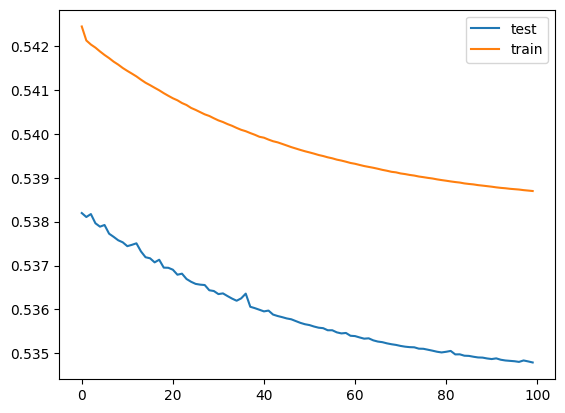

In [443]:
plt.figure()

plt.plot(np.asarray(best_linear_sgd_model.validation_error))
plt.plot(np.asarray(best_linear_sgd_model.training_error))

plt.legend(['test', 'train'])
plt.show()

In [444]:
xseq = np.linspace(x_test.min()-1e-02, x_test.max()+1e-02, 100)
yseq = best_linear_sgd_model.predict(xseq.reshape(-1,1))

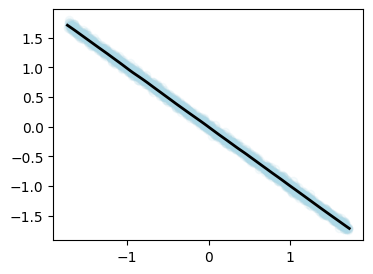

In [445]:
plt.figure(figsize=(4,3))
plt.scatter(x_test,y_test,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

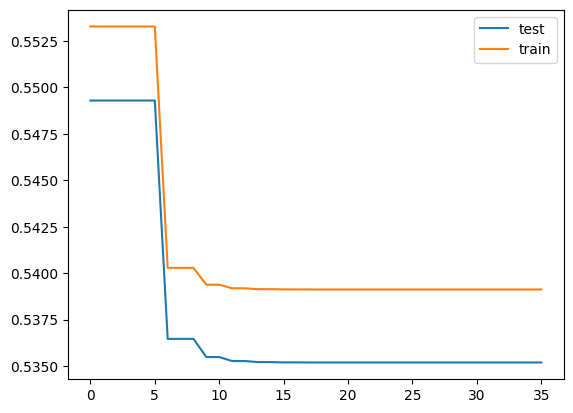

In [446]:
plt.figure()

plt.plot(np.asarray(best_linear_scg_model.validation_error))
plt.plot(np.asarray(best_linear_scg_model.training_error))

plt.legend(['test', 'train'])
plt.show()

In [447]:
xseq = np.linspace(x_test.min()-1e-02, x_test.max()+1e-02, 100)
yseq = best_linear_scg_model.predict(xseq.reshape(-1,1))

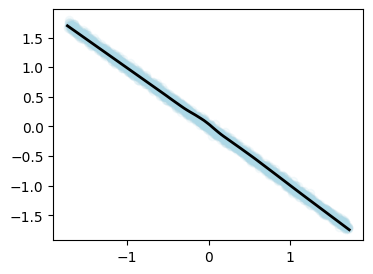

In [448]:
plt.figure(figsize=(4,3))
plt.scatter(x_test,y_test,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

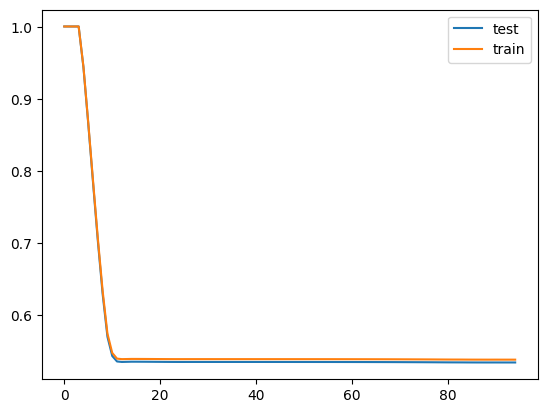

In [449]:
plt.figure()

plt.plot(np.asarray(best_linear_lf_model.validation_error))
plt.plot(np.asarray(best_linear_lf_model.training_error))

plt.legend(['test', 'train'])
plt.show()

In [450]:
xseq = np.linspace(x_test.min()-1e-02, x_test.max()+1e-02, 100)
yseq = best_linear_lf_model.predict(xseq.reshape(-1,1))

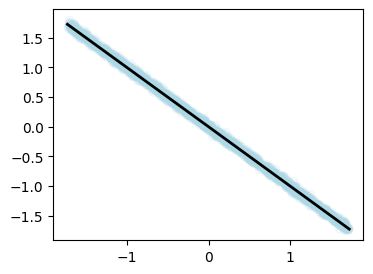

In [451]:
plt.figure(figsize=(4,3))
plt.scatter(x_test,y_test,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

In [452]:
print(f"Best linear SGD test score: {best_linear_sgd_model.score(x_test, y_test)}")
print(f"Best linear SGD train score: {best_linear_sgd_model.score(x_train, y_train)}")
print(f"Best linear SGD validation score: {best_linear_sgd_model.score(x_val, y_val)}\n")

print(f"Best linear SCG test score: {best_linear_scg_model.score(x_test, y_test)}")
print(f"Best linear SCG train score: {best_linear_scg_model.score(x_train, y_train)}")
print(f"Best linear SCG validation score: {best_linear_scg_model.score(x_val, y_val)}\n")

print(f"Best linear LFrog test score: {best_linear_lf_model.score(x_test, y_test)}")
print(f"Best linear LFrog train score: {best_linear_lf_model.score(x_train, y_train)}")
print(f"Best linear LFrog validation score: {best_linear_lf_model.score(x_val, y_val)}")

Best linear SGD test score: 0.001294669231475595
Best linear SGD train score: 0.0013649047977438039
Best linear SGD validation score: 0.0013872615088255746

Best linear SCG test score: 0.00156301053346264
Best linear SCG train score: 0.0016046015121453183
Best linear SCG validation score: 0.0016413467425492382

Best linear LFrog test score: 0.0012193988004327457
Best linear LFrog train score: 0.0012910531827520953
Best linear LFrog validation score: 0.0013092975982689234


## Cubic function approximation:

$$y = 2x^3 + 4x^2 -x + 1 + e$$

In [422]:
def generate_cubic_regression_data(n, scale=1, seed=0):
    np.random.seed(seed)
    x = np.random.uniform(-5, 5,(n,))
    err = np.random.normal(0.,scale, (n,))
    y = 2 * x**3 + 4 * x**2 - x + 1 + err

    mux = np.mean(x)
    muy = np.mean(y)
    sigx = np.std(x)
    sigy = np.std(y)
    x = (x-mux)/sigx
    y = (y-muy)/sigy
    return x,y

In [274]:
x,y = generate_cubic_regression_data(10000)

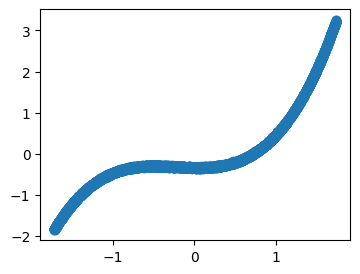

In [275]:
plt.figure(figsize=(4,3))
plt.scatter(x,y)
plt.show()

In [263]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [32]:
from StochasticGradientDescent import SGD

sgd = SGD(eta=0.01, alpha=0.9, num_hidden=256, epochs=100, output_activation='linear', random_state=0, debug=True)
sgd.fit(x, y, x, y)

Epoch 1/100, Error: 0.5548758092165342, Avg Weight Change: 0.00011525399013889157
Validation Error: 0.5519973116589266
Epoch 2/100, Error: 0.5520925947388641, Avg Weight Change: 3.655334048108872e-05
Validation Error: 0.5519990040101682
Epoch 3/100, Error: 0.5520369824413223, Avg Weight Change: 2.4109381430254768e-05
Validation Error: 0.5521393729684436
Epoch 4/100, Error: 0.5520188820967605, Avg Weight Change: 1.7906834474951664e-05
Validation Error: 0.5520038549939779
Epoch 5/100, Error: 0.5520128681982468, Avg Weight Change: 1.4413053571438319e-05
Validation Error: 0.5519966711425675
Epoch 6/100, Error: 0.5520098077848011, Avg Weight Change: 1.2084712506577001e-05
Validation Error: 0.5520112704638799
Epoch 7/100, Error: 0.5520053789569742, Avg Weight Change: 1.0181890683557944e-05
Validation Error: 0.5521435776096667
Epoch 8/100, Error: 0.5520036785076717, Avg Weight Change: 9.164966222241831e-06
Validation Error: 0.5519967391324865
Epoch 9/100, Error: 0.5520031174311952, Avg Weight

In [33]:
xseq = np.linspace(x.min()-1e-02, x.max()+1e-02, 100)
yseq = sgd.predict(xseq.reshape(-1,1))

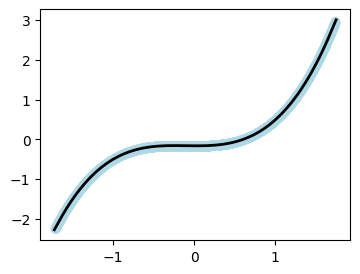

In [34]:
plt.figure(figsize=(4,3))
plt.scatter(x,y,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

In [41]:
from ScaledConjugateGradient import SCG

scg = SCG(num_hidden=256, output_activation='linear', random_state=0, debug=True)
scg.fit(x, y, x, y)

Training error is: 0.6893422930299079 and validation error is: 0.6893422930299079
Training error is: 0.633098492462603 and validation error is: 0.633098492462603
Training error is: 0.5752196921284173 and validation error is: 0.5752196921284173
Training error is: 0.5608891774701474 and validation error is: 0.5608891774701474
Training error is: 0.5585788982864065 and validation error is: 0.5585788982864065
Training error is: 0.5533942165010238 and validation error is: 0.5533942165010238


In [42]:
xseq = np.linspace(x.min()-1e-02, x.max()+1e-02, 100)
yseq = scg.predict(xseq.reshape(-1,1))

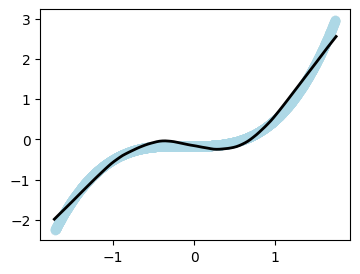

In [43]:
plt.figure(figsize=(4,3))
plt.scatter(x,y,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

In [38]:
from LeapFrog import LFrog

lf = LFrog(num_hidden=256, output_activation='linear', random_state=0, debug=True, num_batches=64)
lf.fit(x, y, x, y)

Training error is: 1.012185856802732 and validation error is: 1.012185856802732
Training error is: 1.0000000000000004 and validation error is: 1.0000000000000004
Training error is: 0.9630169227394441 and validation error is: 0.9630169227394441
Training error is: 0.7183349006506301 and validation error is: 0.7183349006506301
Training error is: 0.6370734249211393 and validation error is: 0.6370734249211393
Training error is: 0.6804457866378624 and validation error is: 0.6804457866378624
Training error is: 0.6968569427461091 and validation error is: 0.6968569427461091
Training error is: 0.7025797983219392 and validation error is: 0.7025797983219392
Training error is: 0.6904651210665395 and validation error is: 0.6904651210665395
Training error is: 0.6676676663450046 and validation error is: 0.6676676663450046
Training error is: 0.6380706493806845 and validation error is: 0.6380706493806845
Training error is: 0.6230243673343826 and validation error is: 0.6230243673343826
Training error is:

In [39]:
xseq = np.linspace(x.min()-1e-02, x.max()+1e-02, 100)
yseq = lf.predict(xseq.reshape(-1,1))

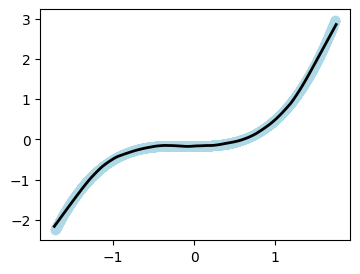

In [40]:
plt.figure(figsize=(4,3))
plt.scatter(x,y,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

## Stochastic Gradient Descent

In [423]:
def reshape_data(x, y):
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    return x, y

def process_fold(n, params):
    eta, alpha, reg_parameter, num_epochs, num_hidden, bias_parameter = params
    model = SGD(eta=eta, alpha=alpha, epochs=num_epochs, num_hidden=num_hidden, 
                reg_parameter=reg_parameter, output_activation='linear', bias=bias_parameter)
    
    x_train, y_train = generate_cubic_regression_data(10000, seed=n)
    x_val, y_val = generate_cubic_regression_data(2000, seed=n+5)
    x_test, y_test = generate_cubic_regression_data(2000, seed=n+10)
    x_train, y_train = reshape_data(x_train, y_train)
    x_val, y_val = reshape_data(x_val, y_val)
    x_test, y_test = reshape_data(x_test, y_test)
    
    model.random_state = n
    model.validation_error = []
    model.training_error = []
    model.fit(x_train, y_train, x_val, y_val)
    score = model.score(x_test, y_test)
    
    return score

def cross_validate(params, n_splits=5):
    scores = Parallel(n_jobs=5)(
        delayed(process_fold)(n, params) for n in range(n_splits)
    )
    return np.mean(scores)

# Define the objective function to minimize (validation error)
def objective(params):
    params_list = list(params)
    print(f"Testing parameters: {params_list}", end='\r')
    sys.stdout.flush()
    
    # Perform cross-validation
    cv_score = cross_validate(params_list)
    
    return cv_score  # Return mean cross-validation error

# Define the hyperparameter search space
search_space = [
    Real(1e-4, 1e-2, "log-uniform", name='eta'),
    Real(0, 0.99, "uniform", name='alpha'),
    Real(1e-4, 1e-1, "uniform", name='reg_parameter'),
    Integer(10, 100, name='num_epochs'),
    Integer(1, 512, name='num_hidden'),
    Real(-1, 1, name='bias_parameter')
]

# Run Bayesian optimization
result = gp_minimize(
    objective,
    search_space,
    n_calls=100,
    n_initial_points=20,
    random_state=0,
    n_jobs=1,  # Keep this at 1 as we're parallelizing inside the objective function
    verbose=True
)

# Print the best hyperparameters found
print("\nBest hyperparameters found:")
print(f"Learning rate (eta): {result.x[0]}")
print(f"Momentum (alpha): {result.x[1]}")
print(f"Regularization (lambda): {result.x[2]}")
print(f"Number of epochs: {result.x[3]}")
print(f"Number of hidden units: {result.x[4]}")
print(f"Bias value: {result.x[5]}")

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.0952074, 0.8579598230609947, 86, 320, -0.23123658541460013]
Time taken: 4.2060
Function value obtained: 1.0000
Current minimum: 1.0000
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.754426876, 0.27272902895065526, 53, 416, -0.040045655249885126]
Time taken: 50.7818
Function value obtained: 0.5146
Current minimum: 0.5146
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.902004, 0.3374624208012267, 68, 189, 0.9143103179060932]
Time taken: 60.9778
Function value obtained: 0.5237
Current minimum: 0.5146
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.57748523, 0.4736606844691832, 82, 267, 0.3577590602379208]
Time taken: 27.6129
Function value obtained: 0.8164
Current minim

In [428]:
x_train, y_train = generate_cubic_regression_data(10000, seed=100)
x_val, y_val = generate_cubic_regression_data(2000, seed=101)
x_test, y_test = generate_cubic_regression_data(2000, seed=102)
x_train, y_train = reshape_data(x_train, y_train)
x_val, y_val = reshape_data(x_val, y_val)
x_test, y_test = reshape_data(x_test, y_test)

In [429]:
best_cubic_sgd_model = SGD(eta=result.x[0], alpha=result.x[1], reg_parameter=result.x[2], num_hidden=result.x[4], output_activation='linear', epochs=result.x[3], random_state=0, bias=result.x[5])
best_cubic_sgd_model.fit(x_train, y_train, x_val, y_val)

In [430]:
print(f"Best cubic SGD test score: {best_cubic_sgd_model.score(x_test, y_test)}")
print(f"Best cubic SGD train score: {best_cubic_sgd_model.score(x_train, y_train)}")
print(f"Best cubic SGD validation score: {best_cubic_sgd_model.score(x_val, y_val)}")

Best cubic SGD test score: 0.0012791839694946629
Best cubic SGD train score: 0.0002648523748178927
Best cubic SGD validation score: 0.0004232492201049989


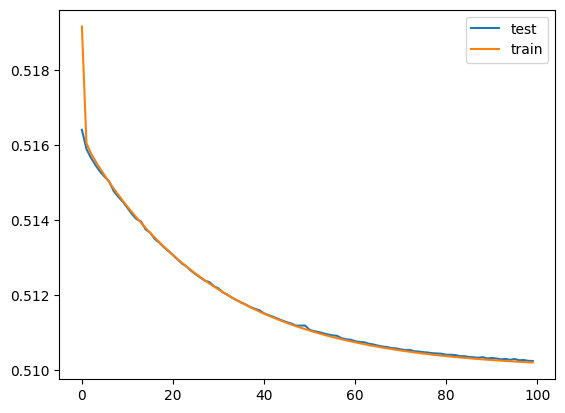

In [431]:
plt.figure()

plt.plot(np.asarray(best_cubic_sgd_model.validation_error))
plt.plot(np.asarray(best_cubic_sgd_model.training_error))

plt.legend(['test', 'train'])
plt.show()

In [432]:
xseq = np.linspace(x_test.min()-1e-02, x_test.max()+1e-02, 100)
yseq = best_cubic_sgd_model.predict(xseq.reshape(-1,1))

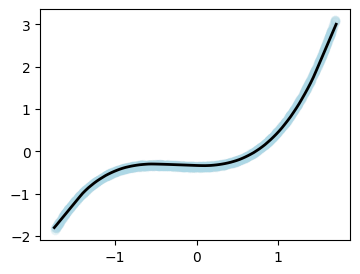

In [433]:
plt.figure(figsize=(4,3))
plt.scatter(x_test,y_test,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

## Scaled Conjugate Gradient

In [468]:
def reshape_data(x, y):
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    return x, y

def process_fold(n, params):
    reg_parameter, num_epochs, num_hidden, bias_parameter = params
    model = SCG(epochs=num_epochs, num_hidden=num_hidden, reg_parameter=reg_parameter, output_activation='linear', bias=bias_parameter)
    
    x_train, y_train = generate_cubic_regression_data(10000, seed=n)
    x_val, y_val = generate_cubic_regression_data(2000, seed=n+5)
    x_test, y_test = generate_cubic_regression_data(2000, seed=n+10)
    x_train, y_train = reshape_data(x_train, y_train)
    x_val, y_val = reshape_data(x_val, y_val)
    x_test, y_test = reshape_data(x_test, y_test)
    
    model.random_state = n
    model.validation_error = []
    model.training_error = []
    model.fit(x_train, y_train, x_val, y_val)
    score = model.score(x_test, y_test)
    
    return score

def cross_validate(params, n_splits=5):
    scores = Parallel(n_jobs=5)(
        delayed(process_fold)(n, params) for n in range(n_splits)
    )
    print(scores)
    return np.mean(scores)

# Define the objective function to minimize (validation error)
def objective(params):
    params_list = list(params)
    print(f"Testing parameters: {params_list}", end='\r')
    sys.stdout.flush()
    
    # Perform cross-validation
    cv_score = cross_validate(params_list)
    
    return cv_score

# Define the hyperparameter search space
search_space = [
    Real(1e-6, 1e-2, "uniform", name='reg_parameter'),
    Integer(100, 1000, name='num_epochs'),
    Integer(1, 512, name='num_hidden'),
    Real(-1, 1, name='bias_parameter')
]

# Run Bayesian optimization
result = gp_minimize(
    objective,
    search_space,
    n_calls=100,
    n_initial_points=20,
    random_state=0,
    n_jobs=1,
    verbose=True
)

# Print the best hyperparameters found
print("\nBest hyperparameters found:")
print(f"Regularization (lambda): {result.x[0]}")
print(f"Number of epochs: {result.x[1]}")
print(f"Number of hidden units: {result.x[2]}")
print(f"Bias value: {result.x[3]}")

Iteration No: 1 started. Evaluating function at random point.
[0.9984093158950359, 0.9982472514400397, 0.997974224704845, 0.6158674432321644, 0.998568057674571]
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 25.8766
Function value obtained: 0.9218
Current minimum: 0.9218
Iteration No: 2 started. Evaluating function at random point.
[0.9133827069766437, 0.9999994530884642, 0.9994208977437411, 0.9993456527761777, 0.9989440079798748]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 10.5362
Function value obtained: 0.9822
Current minimum: 0.9218
Iteration No: 3 started. Evaluating function at random point.
[0.9830801998486545, 0.9909215802624181, 0.9928265156865976, 0.9780005538255668, 0.9842506773671578]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 29.3245
Function value obtained: 0.9858
Current minimum: 0.9218
Iteration No: 4 started. Evaluating function at random point.
[0.7144632817686013, 0.817124967246159, 0.9960242899688

In [469]:
x_train, y_train = generate_cubic_regression_data(10000, seed=100)
x_val, y_val = generate_cubic_regression_data(2000, seed=101)
x_test, y_test = generate_cubic_regression_data(2000, seed=102)
x_train, y_train = reshape_data(x_train, y_train)
x_val, y_val = reshape_data(x_val, y_val)
x_test, y_test = reshape_data(x_test, y_test)

In [470]:
best_cubic_scg_model = SCG(epochs=result.x[1], num_hidden=result.x[2], reg_parameter=result.x[0], output_activation='linear', random_state=0, bias=result.x[3])
best_cubic_scg_model.fit(x_train, y_train, x_val, y_val)

In [471]:
print(f"Best cubic SCG test score: {best_cubic_scg_model.score(x_test, y_test)}")
print(f"Best cubic SCG train score: {best_cubic_scg_model.score(x_train, y_train)}")
print(f"Best cubic SCG validation score: {best_cubic_scg_model.score(x_val, y_val)}")

Best cubic SCG test score: 0.011589467617860288
Best cubic SCG train score: 0.01226917323339167
Best cubic SCG validation score: 0.013046376423071014


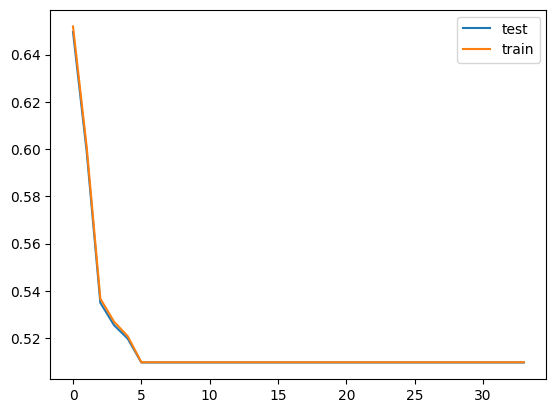

In [472]:
plt.figure()

plt.plot(np.asarray(best_cubic_scg_model.validation_error))
plt.plot(np.asarray(best_cubic_scg_model.training_error))

plt.legend(['test', 'train'])
plt.show()

In [473]:
xseq = np.linspace(x_test.min()-1e-02, x_test.max()+1e-02, 100)
yseq = best_cubic_scg_model.predict(xseq.reshape(-1,1))

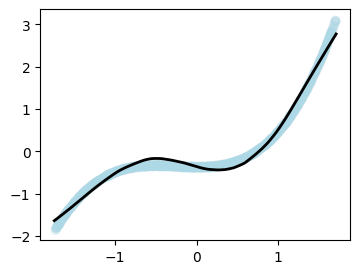

In [474]:
plt.figure(figsize=(4,3))
plt.scatter(x_test,y_test,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

## Leap Frog

In [508]:
def reshape_data(x, y):
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    return x, y

def process_fold(n, params):
    reg_parameter, num_epochs, num_hidden, bias_parameter, num_batches = params
    model = LFrog(epochs=num_epochs, num_hidden=num_hidden, reg_parameter=reg_parameter, output_activation='linear', bias=bias_parameter, num_batches=num_batches)
    
    x_train, y_train = generate_cubic_regression_data(10000, seed=n)
    x_val, y_val = generate_cubic_regression_data(2000, seed=n+5)
    x_test, y_test = generate_cubic_regression_data(2000, seed=n+10)
    x_train, y_train = reshape_data(x_train, y_train)
    x_val, y_val = reshape_data(x_val, y_val)
    x_test, y_test = reshape_data(x_test, y_test)
    
    model.random_state = n
    model.validation_error = []
    model.training_error = []
    model.fit(x_train, y_train, x_val, y_val)
    score = model.score(x_test, y_test)
    
    return score

def cross_validate(params, n_splits=5):
    scores = Parallel(n_jobs=5)(
        delayed(process_fold)(n, params) for n in range(n_splits)
    )
    return np.mean(scores)

# Define the objective function to minimize (validation error)
def objective(params):
    params_list = list(params)
    print(f"Testing parameters: {params_list}", end='\r')
    sys.stdout.flush()
    
    # Perform cross-validation
    cv_score = cross_validate(params_list)
    
    return cv_score  # Return mean cross-validation error

# Define the hyperparameter search space
search_space = [
    Real(1e-4, 1e-1, "uniform", name='reg_parameter'),
    Integer(100, 1000, name='num_epochs'),
    Integer(1, 512, name='num_hidden'),
    Real(-1, 1, name='bias_parameter'),
    Integer(1, 128, name='num_batches')
]

# Run Bayesian optimization
result = gp_minimize(
    objective,
    search_space,
    n_calls=50,
    n_initial_points=20,
    random_state=0,
    n_jobs=1,  # Keep this at 1 as we're parallelizing inside the objective function
    verbose=True
)

# Print the best hyperparameters found
print("\nBest hyperparameters found:")
print(f"Regularization (lambda): {result.x[0]}")
print(f"Number of epochs: {result.x[1]}")
print(f"Number of hidden units: {result.x[2]}")
print(f"Bias value: {result.x[3]}")
print(f"Number of batches units: {result.x[4]}")

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.945034775682513, 80]
Time taken: 32.8834
Function value obtained: 1.0000
Current minimum: 1.0000
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.546874108397735, 62]
Time taken: 0.5698
Function value obtained: 0.8181
Current minimum: 0.8181
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.21575270747555, 44]
Time taken: 9.2209
Function value obtained: 1.0000
Current minimum: 0.8181
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.7192984391747097, 112]
Time taken: 27.8435
Function value obtained: 1.0000
Current minimum: 0.8181
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.3577590602379208, 93]
Time t

In [509]:
x_train, y_train = generate_cubic_regression_data(10000, seed=100)
x_val, y_val = generate_cubic_regression_data(2000, seed=101)
x_test, y_test = generate_cubic_regression_data(2000, seed=102)
x_train, y_train = reshape_data(x_train, y_train)
x_val, y_val = reshape_data(x_val, y_val)
x_test, y_test = reshape_data(x_test, y_test)

In [510]:
best_cubic_lf_model = LFrog(epochs=result.x[1], num_hidden=result.x[2], reg_parameter=result.x[0], output_activation='linear', random_state=0, bias=result.x[3], num_batches=result.x[4])
best_cubic_lf_model.fit(x_train, y_train, x_val, y_val)

In [511]:
print(f"Best cubic LFrog test score: {best_cubic_lf_model.score(x_test, y_test)}")
print(f"Best cubic LFrog train score: {best_cubic_lf_model.score(x_train, y_train)}")
print(f"Best cubic LFrog validation score: {best_cubic_lf_model.score(x_val, y_val)}")

Best cubic LFrog test score: 0.004231663522055203
Best cubic LFrog train score: 0.003118903502407155
Best cubic LFrog validation score: 0.003583941135780158


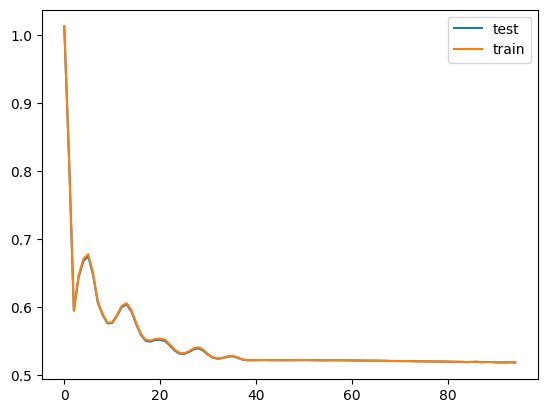

In [512]:
plt.figure()

plt.plot(np.asarray(best_cubic_lf_model.validation_error))
plt.plot(np.asarray(best_cubic_lf_model.training_error))

plt.legend(['test', 'train'])
plt.show()

In [513]:
xseq = np.linspace(x_test.min()-1e-02, x_test.max()+1e-02, 100)
yseq = best_cubic_lf_model.predict(xseq.reshape(-1,1))

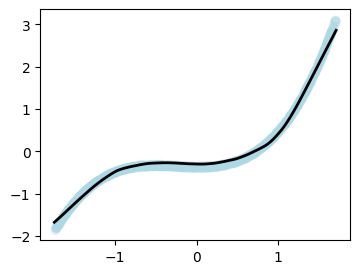

In [514]:
plt.figure(figsize=(4,3))
plt.scatter(x_test,y_test,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

# Compare the 3 types of models against one another

In [515]:
import time
import numpy as np
from joblib import Parallel, delayed
import sys

def reshape_data(x, y):
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    return x, y

def process_fold(n, model, name):
    start_time = time.time()
    
    x_train, y_train = generate_cubic_regression_data(10000, seed=n+20)
    x_val, y_val = generate_cubic_regression_data(2000, seed=n+25)
    x_test, y_test = generate_cubic_regression_data(2000, seed=n+30)
    x_train, y_train = reshape_data(x_train, y_train)
    x_val, y_val = reshape_data(x_val, y_val)
    x_test, y_test = reshape_data(x_test, y_test)
    
    # Update model's random state
    model.random_state = n + 10
    
    # Reset model's internal state
    model.validation_error = []
    model.training_error = []
    
    # Fit the model
    model.fit(x_train, y_train, x_val, y_val)
    
    # Calculate the score
    score = model.score(x_test, y_test)
    
    # Calculate the elapsed time
    elapsed_time = time.time() - start_time
    
    # Update progress
    sys.stdout.write(f'\rProcessing {name}: Fold {n+1}/10 completed')
    sys.stdout.flush()
    
    return score, elapsed_time

def cross_validate(model, name, n_splits=10):
    results = Parallel(n_jobs=5)(
        delayed(process_fold)(n, model, name) 
        for n in range(n_splits)
    )
    scores, times = zip(*results)
    return list(scores), list(times)

# Define models and their names
models = [best_cubic_sgd_model, best_cubic_scg_model, best_cubic_lf_model]
model_names = ['Stochastic Gradient Descent', 'Scaled Conjugate Gradient', 'Leap Frog Optimiser']

model_cv_scores = []
model_cv_times = []

for model, name in zip(models, model_names):
    print(f"\nCross-validating {name}:")
    scores, times = cross_validate(model, name)
    model_cv_scores.append(scores)
    model_cv_times.append(times)
    
    # Clear the progress line
    sys.stdout.write('\r' + ' ' * 50 + '\r')
    sys.stdout.flush()
    
    print(f"Completed cross-validation for {name}")
    print(f"Mean score: {np.mean(scores):.4f} ± {np.std(scores):.4f}")
    print(f"Mean time: {np.mean(times):.2f}s ± {np.std(times):.2f}s")

# Print overall results
print("\nOverall Results:")
for name, scores, times in zip(model_names, model_cv_scores, model_cv_times):
    print(f"{name}:")
    print(f"  Mean score: {np.mean(scores):.4f} ± {np.std(scores):.4f}")
    print(f"  Mean time: {np.mean(times):.2f}s ± {np.std(times):.2f}s")


Cross-validating Stochastic Gradient Descent:
Completed cross-validation for Stochastic Gradient Descent
Mean score: 0.0009 ± 0.0003
Mean time: 270.96s ± 5.39s

Cross-validating Scaled Conjugate Gradient:
Completed cross-validation for Scaled Conjugate Gradient
Mean score: 0.1239 ± 0.1190
Mean time: 18.46s ± 2.49s

Cross-validating Leap Frog Optimiser:
Completed cross-validation for Leap Frog Optimiser
Mean score: 0.0080 ± 0.0031
Mean time: 26.96s ± 0.93s

Overall Results:
Stochastic Gradient Descent:
  Mean score: 0.0009 ± 0.0003
  Mean time: 270.96s ± 5.39s
Scaled Conjugate Gradient:
  Mean score: 0.1239 ± 0.1190
  Mean time: 18.46s ± 2.49s
Leap Frog Optimiser:
  Mean score: 0.0080 ± 0.0031
  Mean time: 26.96s ± 0.93s


In [516]:
stat, p_value = shapiro(model_cv_scores)

print(f'Statistic={stat}, p-value={p_value}')
if p_value > 0.05:
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")

Statistic=0.527849005063145, p-value=1.0688338451520911e-08
Data is not normally distributed



Best model (Stochastic Gradient Descent) mean squared error: 0.0040


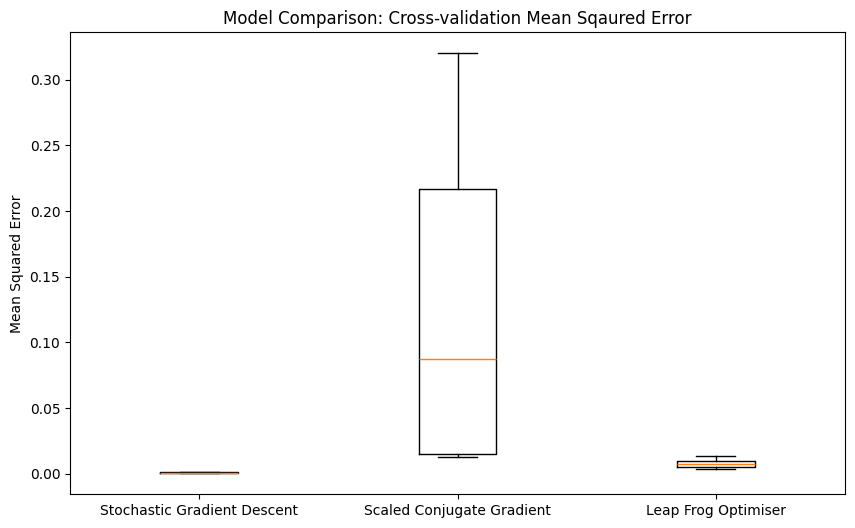

In [517]:
x_train, y_train = generate_cubic_regression_data(10000, seed=1000)
x_val, y_val = generate_cubic_regression_data(2000, seed=1001)
x_test, y_test = generate_cubic_regression_data(2000, seed=1002)
x_train, y_train = reshape_data(x_train, y_train)
x_val, y_val = reshape_data(x_val, y_val)
x_test, y_test = reshape_data(x_test, y_test)

# Train the best model on the entire training set and evaluate on the test set
best_model_index = np.argmin([np.mean(scores) for scores in model_cv_scores])
best_model = models[best_model_index]
best_model.fit(x_train, y_train, x_val, y_val)
test_accuracy = best_model.score(x_test, y_test)
print(f"\nBest model ({model_names[best_model_index]}) mean squared error: {test_accuracy:.4f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.boxplot(model_cv_scores, labels=model_names)
plt.title('Model Comparison: Cross-validation Mean Sqaured Error')
plt.ylabel('Mean Squared Error')
plt.show()

In [519]:
stat, p_value = kruskal(*model_cv_scores)
print(f"Statistic: {stat}, p-value: {p_value}")

Statistic: 25.30064516129032, p-value: 3.206525580636635e-06


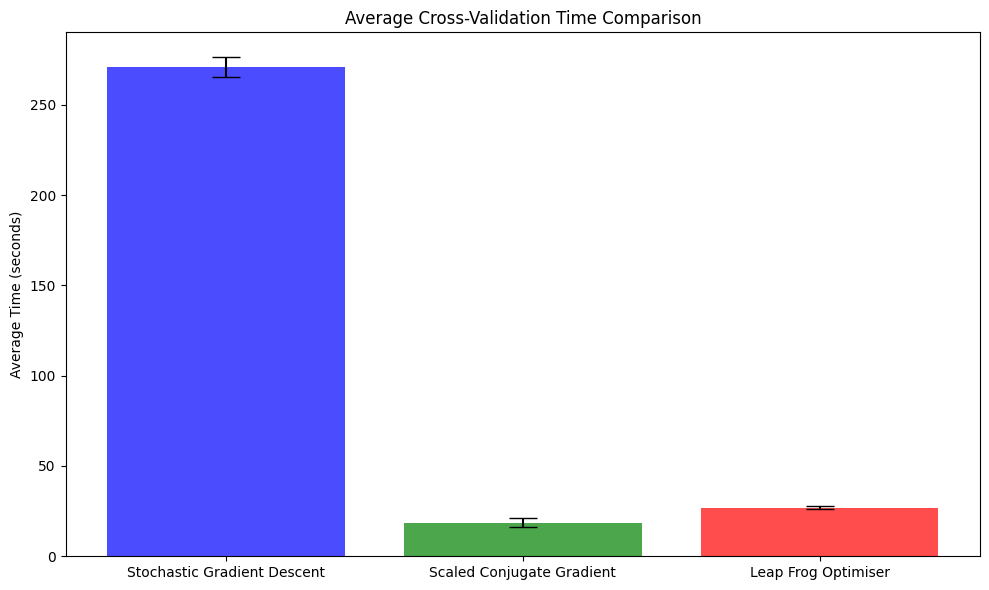

In [520]:
mean_times = [np.mean(times) for times in model_cv_times]
std_times = [np.std(times) for times in model_cv_times]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
x_pos = np.arange(len(model_names))

ax.bar(x_pos, mean_times, yerr=std_times, align='center', alpha=0.7, capsize=10, color=['blue', 'green', 'red'])
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names)
ax.set_ylabel('Average Time (seconds)')
ax.set_title('Average Cross-Validation Time Comparison')
# ax.yaxis.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [521]:
stat, p_value = kruskal(*model_cv_times)
print(f"Statistic: {stat}, p-value: {p_value}")

Statistic: 25.80645161290323, p-value: 2.49000508218493e-06


In [523]:
import numpy as np
from scipy import stats

def perform_paired_ttests(model_cv_scores, model_names):
    n_models = len(model_names)
    results = []

    for i in range(n_models):
        for j in range(i+1, n_models):
            t_statistic, p_value = stats.ttest_rel(model_cv_scores[i], model_cv_scores[j])
            results.append({
                'model1': model_names[i],
                'model2': model_names[j],
                't_statistic': t_statistic,
                'p_value': p_value
            })
    
    return results

# Perform paired t-tests
ttest_results = perform_paired_ttests(model_cv_scores, model_names)

# Print results
print("\nPaired T-Test Results:")
for result in ttest_results:
    print(f"{result['model1']} vs {result['model2']}:")
    print(f"  t-statistic: {result['t_statistic']:.4f}")
    print(f"  p-value: {result['p_value']:.4f}")
    if result['p_value'] < 0.05:
        print("  Significant difference detected (p < 0.05)")
    else:
        print("  No significant difference detected (p >= 0.05)")
    print()


Paired T-Test Results:
Stochastic Gradient Descent vs Scaled Conjugate Gradient:
  t-statistic: -3.1012
  p-value: 0.0127
  Significant difference detected (p < 0.05)

Stochastic Gradient Descent vs Leap Frog Optimiser:
  t-statistic: -7.1644
  p-value: 0.0001
  Significant difference detected (p < 0.05)

Scaled Conjugate Gradient vs Leap Frog Optimiser:
  t-statistic: 2.9116
  p-value: 0.0173
  Significant difference detected (p < 0.05)



In [535]:
x_train, y_train = generate_cubic_regression_data(10000, seed=100)
x_val, y_val = generate_cubic_regression_data(2000, seed=101)
x_test, y_test = generate_cubic_regression_data(2000, seed=102)
x_train, y_train = reshape_data(x_train, y_train)
x_val, y_val = reshape_data(x_val, y_val)
x_test, y_test = reshape_data(x_test, y_test)

In [536]:
best_cubic_sgd_model.fit(x_train, y_train, x_val, y_val)
best_cubic_scg_model.fit(x_train, y_train, x_val, y_val)
best_cubic_lf_model.fit(x_train, y_train, x_val, y_val)

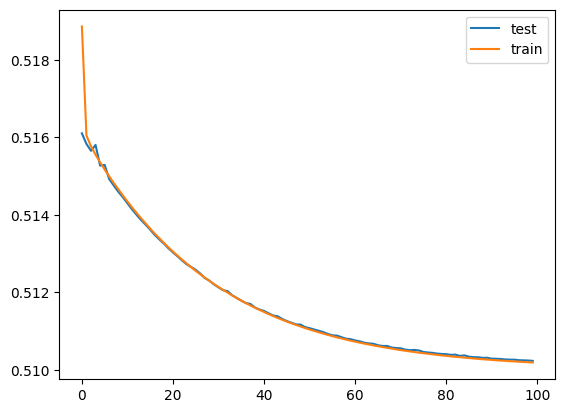

In [537]:
plt.figure()

plt.plot(np.asarray(best_cubic_sgd_model.validation_error))
plt.plot(np.asarray(best_cubic_sgd_model.training_error))

plt.legend(['test', 'train'])
plt.show()

In [538]:
xseq = np.linspace(x_test.min()-1e-02, x_test.max()+1e-02, 100)
yseq = best_cubic_sgd_model.predict(xseq.reshape(-1,1))

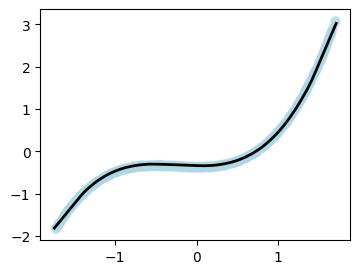

In [539]:
plt.figure(figsize=(4,3))
plt.scatter(x_test,y_test,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

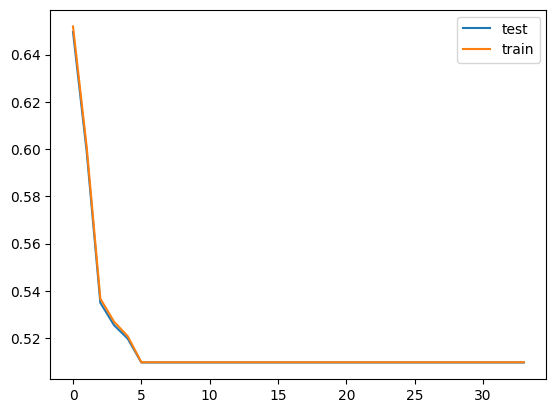

In [540]:
plt.figure()

plt.plot(np.asarray(best_cubic_scg_model.validation_error))
plt.plot(np.asarray(best_cubic_scg_model.training_error))

plt.legend(['test', 'train'])
plt.show()

In [541]:
xseq = np.linspace(x_test.min()-1e-02, x_test.max()+1e-02, 100)
yseq = best_cubic_scg_model.predict(xseq.reshape(-1,1))

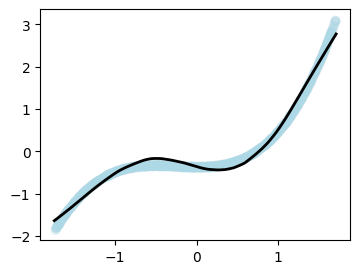

In [542]:
plt.figure(figsize=(4,3))
plt.scatter(x_test,y_test,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

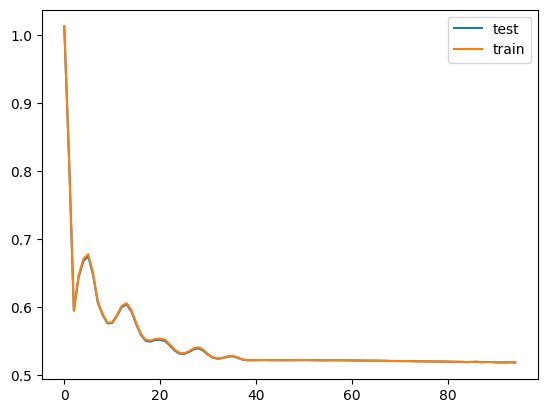

In [543]:
plt.figure()

plt.plot(np.asarray(best_cubic_lf_model.validation_error))
plt.plot(np.asarray(best_cubic_lf_model.training_error))

plt.legend(['test', 'train'])
plt.show()

In [544]:
xseq = np.linspace(x_test.min()-1e-02, x_test.max()+1e-02, 100)
yseq = best_cubic_lf_model.predict(xseq.reshape(-1,1))

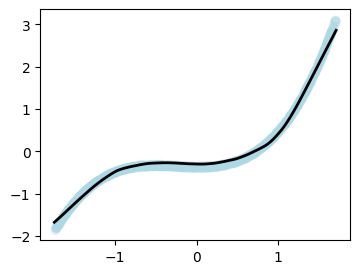

In [545]:
plt.figure(figsize=(4,3))
plt.scatter(x_test,y_test,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

## Logistic function approximation

$$y = \frac{1}{1 + e^{-sin(x) + cos(2x)}} + err$$

In [3]:
def generate_logistic_regression_data(n, scale=0.03, seed=0):
    np.random.seed(seed)
    x = np.random.uniform(-5, 5,(n,))
    err = np.random.normal(0.,scale, (n,))
    y = (1 / (1 + np.exp(-np.sin(x) + np.cos(2*x)))) + err

    mux = np.mean(x)
    muy = np.mean(y)
    sigx = np.std(x)
    sigy = np.std(y)
    x = (x-mux)/sigx
    y = (y-muy)/sigy
    return x,y

## Stochastic Gradient Descent

In [6]:
def reshape_data(x, y):
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    return x, y

def process_fold(n, params):
    eta, alpha, reg_parameter, num_epochs, num_hidden, bias_parameter = params
    model = SGD(eta=eta, alpha=alpha, epochs=num_epochs, num_hidden=num_hidden, 
                reg_parameter=reg_parameter, output_activation='linear', bias=bias_parameter)
    
    x_train, y_train = generate_logistic_regression_data(10000, seed=n)
    x_val, y_val = generate_logistic_regression_data(2000, seed=n+5)
    x_test, y_test = generate_logistic_regression_data(2000, seed=n+10)
    x_train, y_train = reshape_data(x_train, y_train)
    x_val, y_val = reshape_data(x_val, y_val)
    x_test, y_test = reshape_data(x_test, y_test)
    
    model.random_state = n
    model.validation_error = []
    model.training_error = []
    model.fit(x_train, y_train, x_val, y_val)
    score = model.score(x_test, y_test)
    
    return score

def cross_validate(params, n_splits=5):
    scores = Parallel(n_jobs=5)(
        delayed(process_fold)(n, params) for n in range(n_splits)
    )
    return np.mean(scores)

# Define the objective function to minimize (validation error)
def objective(params):
    params_list = list(params)
    print(f"Testing parameters: {params_list}", end='\r')
    sys.stdout.flush()
    
    # Perform cross-validation
    cv_score = cross_validate(params_list)
    
    return cv_score  # Return mean cross-validation error

# Define the hyperparameter search space
search_space = [
    Real(1e-4, 1e-2, "log-uniform", name='eta'),
    Real(0, 0.99, "uniform", name='alpha'),
    Real(1e-4, 1e-1, "uniform", name='reg_parameter'),
    Integer(10, 100, name='num_epochs'),
    Integer(1, 512, name='num_hidden'),
    Real(-1, 1, name='bias_parameter')
]

# Run Bayesian optimization
result = gp_minimize(
    objective,
    search_space,
    n_calls=50,
    n_initial_points=20,
    random_state=0,
    n_jobs=1,  # Keep this at 1 as we're parallelizing inside the objective function
    verbose=True
)

# Print the best hyperparameters found
print("\nBest hyperparameters found:")
print(f"Learning rate (eta): {result.x[0]}")
print(f"Momentum (alpha): {result.x[1]}")
print(f"Regularization (lambda): {result.x[2]}")
print(f"Number of epochs: {result.x[3]}")
print(f"Number of hidden units: {result.x[4]}")
print(f"Bias value: {result.x[5]}")

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.0952074, 0.08580876720051343, 86, 320, -0.23123658541460013]
Time taken: 56.0423
Function value obtained: 0.9831
Current minimum: 0.9831
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.754426876, 0.027338363828553314, 53, 416, -0.040045655249885126]
Time taken: 158.8956
Function value obtained: 0.9766
Current minimum: 0.9766
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.902004, 0.033805876425685125, 68, 189, 0.9143103179060932]
Time taken: 34.4730
Function value obtained: 0.7121
Current minimum: 0.7121
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.57748523, 0.047413443722843694, 82, 267, 0.3577590602379208]
Time taken: 225.4047
Function value obtained: 0.9567
Curr

In [7]:
x_train, y_train = generate_logistic_regression_data(10000, seed=100)
x_val, y_val = generate_logistic_regression_data(2000, seed=101)
x_test, y_test = generate_logistic_regression_data(2000, seed=102)
x_train, y_train = reshape_data(x_train, y_train)
x_val, y_val = reshape_data(x_val, y_val)
x_test, y_test = reshape_data(x_test, y_test)

In [8]:
best_log_sgd_model = SGD(eta=result.x[0], alpha=result.x[1], reg_parameter=result.x[2], num_hidden=result.x[4], output_activation='linear', epochs=result.x[3], random_state=0, bias=result.x[5])
best_log_sgd_model.fit(x_train, y_train, x_val, y_val)

In [9]:
print(f"Best logistic SGD test score: {best_log_sgd_model.score(x_test, y_test)}")
print(f"Best logistic SGD train score: {best_log_sgd_model.score(x_train, y_train)}")
print(f"Best logistic SGD validation score: {best_log_sgd_model.score(x_val, y_val)}")

Best logistic SGD test score: 0.045333523466633746
Best logistic SGD train score: 0.033945739754393196
Best logistic SGD validation score: 0.03449709936326508


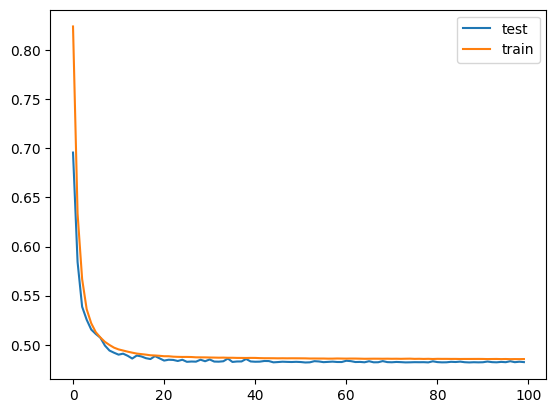

In [10]:
plt.figure()

plt.plot(np.asarray(best_log_sgd_model.validation_error))
plt.plot(np.asarray(best_log_sgd_model.training_error))

plt.legend(['test', 'train'])
plt.show()

In [11]:
xseq = np.linspace(x_test.min()-1e-02, x_test.max()+1e-02, 100)
yseq = best_log_sgd_model.predict(xseq.reshape(-1,1))

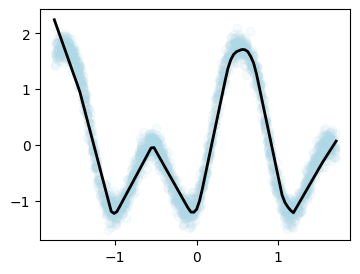

In [12]:
plt.figure(figsize=(4,3))
plt.scatter(x_test,y_test,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

## Scaled Conjugate Gradient

In [45]:
def reshape_data(x, y):
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    return x, y

def process_fold(n, params):
    reg_parameter, num_epochs, num_hidden, bias_parameter = params
    model = SCG(epochs=num_epochs, num_hidden=num_hidden, reg_parameter=reg_parameter, output_activation='linear', bias=bias_parameter)
    
    x_train, y_train = generate_logistic_regression_data(10000, seed=n)
    x_val, y_val = generate_logistic_regression_data(2000, seed=n+5)
    x_test, y_test = generate_logistic_regression_data(2000, seed=n+10)
    x_train, y_train = reshape_data(x_train, y_train)
    x_val, y_val = reshape_data(x_val, y_val)
    x_test, y_test = reshape_data(x_test, y_test)
    
    model.random_state = n
    model.validation_error = []
    model.training_error = []
    model.fit(x_train, y_train, x_val, y_val)
    score = model.score(x_test, y_test)
    
    return score

def cross_validate(params, n_splits=5):
    scores = Parallel(n_jobs=5)(
        delayed(process_fold)(n, params) for n in range(n_splits)
    )
    print(scores)
    return np.mean(scores)

# Define the objective function to minimize (validation error)
def objective(params):
    params_list = list(params)
    print(f"Testing parameters: {params_list}", end='\r')
    sys.stdout.flush()
    
    # Perform cross-validation
    cv_score = cross_validate(params_list)
    
    return cv_score

# Define the hyperparameter search space
search_space = [
    Real(1e-6, 1e-2, "uniform", name='reg_parameter'),
    Integer(100, 1000, name='num_epochs'),
    Integer(1, 512, name='num_hidden'),
    Real(-1, 1, name='bias_parameter')
]

# Run Bayesian optimization
result = gp_minimize(
    objective,
    search_space,
    n_calls=100,
    n_initial_points=20,
    random_state=0,
    n_jobs=1,
    verbose=True
)

# Print the best hyperparameters found
print("\nBest hyperparameters found:")
print(f"Regularization (lambda): {result.x[0]}")
print(f"Number of epochs: {result.x[1]}")
print(f"Number of hidden units: {result.x[2]}")
print(f"Bias value: {result.x[3]}")

Iteration No: 1 started. Evaluating function at random point.
[0.9999999944450831, 0.988847729050063, 0.9999905586215245, 0.9999999919582718, 0.9684008224849484]
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 23.8271
Function value obtained: 0.9914
Current minimum: 0.9914
Iteration No: 2 started. Evaluating function at random point.
[0.9999999978833032, 1.0000000190308798, 0.9999955111847803, 0.9999791227942878, 0.9931737783625922]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 8.1353
Function value obtained: 0.9986
Current minimum: 0.9914
Iteration No: 3 started. Evaluating function at random point.
[0.9625369412907798, 0.9998777107349512, 0.9997425020590371, 0.9999993792882601, 0.9797229057080402]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 24.1904
Function value obtained: 0.9884
Current minimum: 0.9884
Iteration No: 4 started. Evaluating function at random point.
[0.9999999905663108, 0.9999999966283124, 0.999999938410

In [46]:
x_train, y_train = generate_logistic_regression_data(10000, seed=100)
x_val, y_val = generate_logistic_regression_data(2000, seed=101)
x_test, y_test = generate_logistic_regression_data(2000, seed=102)
x_train, y_train = reshape_data(x_train, y_train)
x_val, y_val = reshape_data(x_val, y_val)
x_test, y_test = reshape_data(x_test, y_test)

In [47]:
best_log_scg_model = SCG(epochs=result.x[1], num_hidden=result.x[2], reg_parameter=result.x[0], output_activation='linear', random_state=0, bias=result.x[3])
best_log_scg_model.fit(x_train, y_train, x_val, y_val)

In [48]:
print(f"Best logistic SCG test score: {best_log_scg_model.score(x_test, y_test)}")
print(f"Best logistic SCG train score: {best_log_scg_model.score(x_train, y_train)}")
print(f"Best logistic SCG validation score: {best_log_scg_model.score(x_val, y_val)}")

Best logistic SCG test score: 0.45167148734913015
Best logistic SCG train score: 0.44183187089377796
Best logistic SCG validation score: 0.4265754665437795


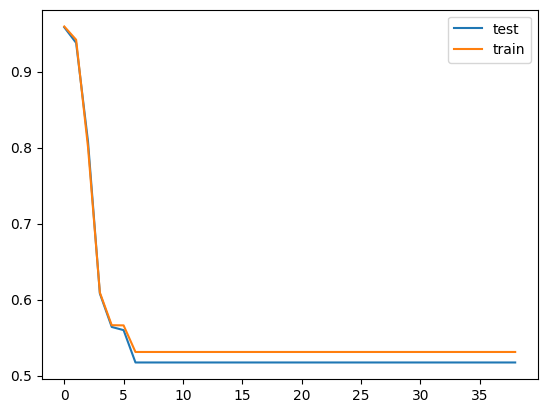

In [49]:
plt.figure()

plt.plot(np.asarray(best_log_scg_model.validation_error))
plt.plot(np.asarray(best_log_scg_model.training_error))

plt.legend(['test', 'train'])
plt.show()

In [50]:
xseq = np.linspace(x_test.min()-1e-02, x_test.max()+1e-02, 100)
yseq = best_log_scg_model.predict(xseq.reshape(-1,1))

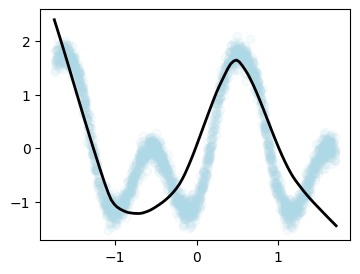

In [51]:
plt.figure(figsize=(4,3))
plt.scatter(x_test,y_test,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

## Leap Frog

In [20]:
def reshape_data(x, y):
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    return x, y

def process_fold(n, params):
    reg_parameter, num_epochs, num_hidden, bias_parameter, num_batches = params
    model = LFrog(epochs=num_epochs, num_hidden=num_hidden, reg_parameter=reg_parameter, output_activation='linear', bias=bias_parameter, num_batches=num_batches)
    
    x_train, y_train = generate_logistic_regression_data(10000, seed=n)
    x_val, y_val = generate_logistic_regression_data(2000, seed=n+5)
    x_test, y_test = generate_logistic_regression_data(2000, seed=n+10)
    x_train, y_train = reshape_data(x_train, y_train)
    x_val, y_val = reshape_data(x_val, y_val)
    x_test, y_test = reshape_data(x_test, y_test)
    
    model.random_state = n
    model.validation_error = []
    model.training_error = []
    model.fit(x_train, y_train, x_val, y_val)
    score = model.score(x_test, y_test)
    
    return score

def cross_validate(params, n_splits=5):
    scores = Parallel(n_jobs=5)(
        delayed(process_fold)(n, params) for n in range(n_splits)
    )
    return np.mean(scores)

# Define the objective function to minimize (validation error)
def objective(params):
    params_list = list(params)
    print(f"Testing parameters: {params_list}", end='\r')
    sys.stdout.flush()
    
    # Perform cross-validation
    cv_score = cross_validate(params_list)
    
    return cv_score  # Return mean cross-validation error

# Define the hyperparameter search space
search_space = [
    Real(1e-4, 1e-1, "uniform", name='reg_parameter'),
    Integer(100, 1000, name='num_epochs'),
    Integer(1, 512, name='num_hidden'),
    Real(-1, 1, name='bias_parameter'),
    Integer(1, 128, name='num_batches')
]

# Run Bayesian optimization
result = gp_minimize(
    objective,
    search_space,
    n_calls=100,
    n_initial_points=20,
    random_state=0,
    n_jobs=1,  # Keep this at 1 as we're parallelizing inside the objective function
    verbose=True
)

# Print the best hyperparameters found
print("\nBest hyperparameters found:")
print(f"Regularization (lambda): {result.x[0]}")
print(f"Number of epochs: {result.x[1]}")
print(f"Number of hidden units: {result.x[2]}")
print(f"Bias value: {result.x[3]}")
print(f"Number of batches units: {result.x[4]}")

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.945034775682513, 80]
Time taken: 23.6365
Function value obtained: 1.0000
Current minimum: 1.0000
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.546874108397735, 62]
Time taken: 2.3602
Function value obtained: 1.0000
Current minimum: 1.0000
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.21575270747555, 44]
Time taken: 9.3943
Function value obtained: 1.0000
Current minimum: 1.0000
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.7192984391747097, 112]
Time taken: 25.8982
Function value obtained: 1.0000
Current minimum: 1.0000
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.3577590602379208, 93]
Time t

In [21]:
x_train, y_train = generate_logistic_regression_data(10000, seed=100)
x_val, y_val = generate_logistic_regression_data(2000, seed=101)
x_test, y_test = generate_logistic_regression_data(2000, seed=102)
x_train, y_train = reshape_data(x_train, y_train)
x_val, y_val = reshape_data(x_val, y_val)
x_test, y_test = reshape_data(x_test, y_test)

In [22]:
best_log_lf_model = LFrog(epochs=result.x[1], num_hidden=result.x[2], reg_parameter=result.x[0], output_activation='linear', random_state=0, bias=result.x[3], num_batches=result.x[4])
best_log_lf_model.fit(x_train, y_train, x_val, y_val)

In [23]:
print(f"Best logistic LFrog test score: {best_log_lf_model.score(x_test, y_test)}")
print(f"Best logistic LFrog train score: {best_log_lf_model.score(x_train, y_train)}")
print(f"Best logistic LFrog validation score: {best_log_lf_model.score(x_val, y_val)}")

Best logistic LFrog test score: 0.09650109623181286
Best logistic LFrog train score: 0.07628783514223125
Best logistic LFrog validation score: 0.07663815758122013


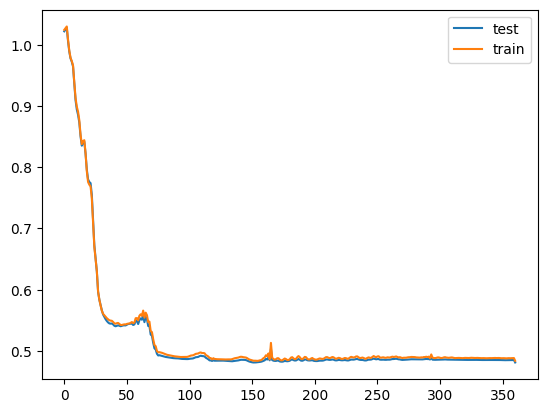

In [24]:
plt.figure()

plt.plot(np.asarray(best_log_lf_model.validation_error))
plt.plot(np.asarray(best_log_lf_model.training_error))

plt.legend(['test', 'train'])
plt.show()

In [25]:
xseq = np.linspace(x_test.min()-1e-02, x_test.max()+1e-02, 100)
yseq = best_log_lf_model.predict(xseq.reshape(-1,1))

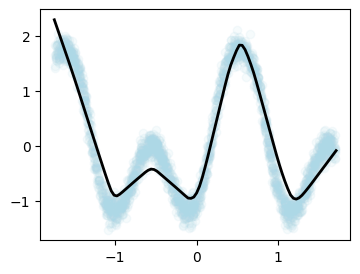

In [26]:
plt.figure(figsize=(4,3))
plt.scatter(x_test,y_test,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

# Compare the 3 types of models against one another

In [70]:
import time
import numpy as np
from joblib import Parallel, delayed
import sys

def reshape_data(x, y):
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    return x, y

def process_fold(n, model, name):
    start_time = time.time()
    
    x_train, y_train = generate_logistic_regression_data(10000, seed=n+20)
    x_val, y_val = generate_logistic_regression_data(2000, seed=n+25)
    x_test, y_test = generate_logistic_regression_data(2000, seed=n+30)
    x_train, y_train = reshape_data(x_train, y_train)
    x_val, y_val = reshape_data(x_val, y_val)
    x_test, y_test = reshape_data(x_test, y_test)
    
    # Update model's random state
    model.random_state = n + 10
    
    # Reset model's internal state
    model.validation_error = []
    model.training_error = []
    
    # Fit the model
    model.fit(x_train, y_train, x_val, y_val)
    
    # Calculate the score
    score = model.score(x_test, y_test)
    
    # Calculate the elapsed time
    elapsed_time = time.time() - start_time
    
    # Update progress
    sys.stdout.write(f'\rProcessing {name}: Fold {n+1}/10 completed')
    sys.stdout.flush()
    
    return score, elapsed_time

def cross_validate(model, name, n_splits=10):
    results = Parallel(n_jobs=5)(
        delayed(process_fold)(n, model, name) 
        for n in range(n_splits)
    )
    scores, times = zip(*results)
    return list(scores), list(times)

# Define models and their names
models = [best_log_sgd_model, best_log_scg_model, best_log_lf_model]
model_names = ['Stochastic Gradient Descent', 'Scaled Conjugate Gradient', 'Leap Frog Optimiser']

model_cv_scores = []
model_cv_times = []

for model, name in zip(models, model_names):
    print(f"\nCross-validating {name}:")
    scores, times = cross_validate(model, name)
    model_cv_scores.append(scores)
    model_cv_times.append(times)
    
    # Clear the progress line
    sys.stdout.write('\r' + ' ' * 50 + '\r')
    sys.stdout.flush()
    
    print(f"Completed cross-validation for {name}")
    print(f"Mean score: {np.mean(scores):.4f} ± {np.std(scores):.4f}")
    print(f"Mean time: {np.mean(times):.2f}s ± {np.std(times):.2f}s")

# Print overall results
print("\nOverall Results:")
for name, scores, times in zip(model_names, model_cv_scores, model_cv_times):
    print(f"{name}:")
    print(f"  Mean score: {np.mean(scores):.4f} ± {np.std(scores):.4f}")
    print(f"  Mean time: {np.mean(times):.2f}s ± {np.std(times):.2f}s")


Cross-validating Stochastic Gradient Descent:
Completed cross-validation for Stochastic Gradient Descent
Mean score: 0.0640 ± 0.0646
Mean time: 221.71s ± 73.15s

Cross-validating Scaled Conjugate Gradient:
Completed cross-validation for Scaled Conjugate Gradient
Mean score: 0.5036 ± 0.2195
Mean time: 49.17s ± 7.90s

Cross-validating Leap Frog Optimiser:
Completed cross-validation for Leap Frog Optimiser
Mean score: 0.1031 ± 0.0137
Mean time: 119.14s ± 3.45s

Overall Results:
Stochastic Gradient Descent:
  Mean score: 0.0640 ± 0.0646
  Mean time: 221.71s ± 73.15s
Scaled Conjugate Gradient:
  Mean score: 0.5036 ± 0.2195
  Mean time: 49.17s ± 7.90s
Leap Frog Optimiser:
  Mean score: 0.1031 ± 0.0137
  Mean time: 119.14s ± 3.45s


In [71]:
stat, p_value = shapiro(model_cv_scores)

print(f'Statistic={stat}, p-value={p_value}')
if p_value > 0.05:
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")

Statistic=0.7597797231216253, p-value=1.3156558277775341e-05
Data is not normally distributed



Best model (Stochastic Gradient Descent) mean squared error: 0.0544


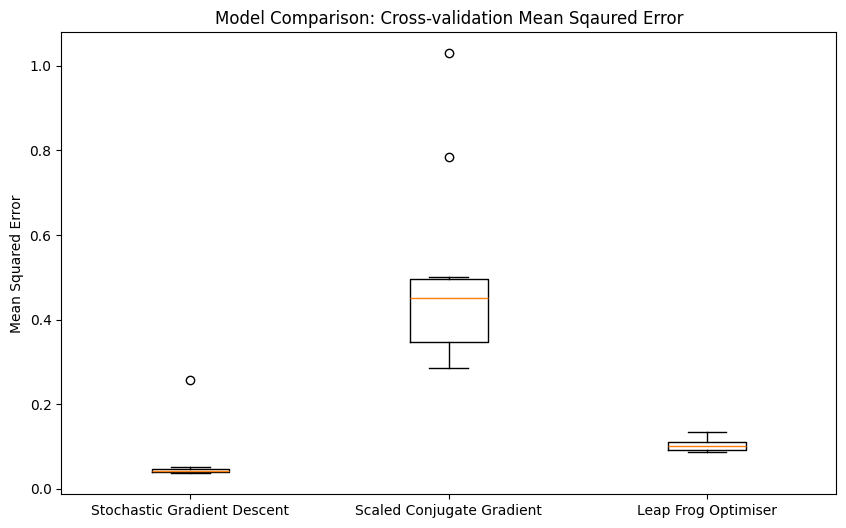

In [72]:
x_train, y_train = generate_logistic_regression_data(10000, seed=1000)
x_val, y_val = generate_logistic_regression_data(2000, seed=1001)
x_test, y_test = generate_logistic_regression_data(2000, seed=1002)
x_train, y_train = reshape_data(x_train, y_train)
x_val, y_val = reshape_data(x_val, y_val)
x_test, y_test = reshape_data(x_test, y_test)

# Train the best model on the entire training set and evaluate on the test set
best_model_index = np.argmin([np.mean(scores) for scores in model_cv_scores])
best_model = models[best_model_index]
best_model.fit(x_train, y_train, x_val, y_val)
test_accuracy = best_model.score(x_test, y_test)
print(f"\nBest model ({model_names[best_model_index]}) mean squared error: {test_accuracy:.4f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.boxplot(model_cv_scores, labels=model_names)
plt.title('Model Comparison: Cross-validation Mean Sqaured Error')
plt.ylabel('Mean Squared Error')
plt.show()

In [88]:
stat, p_value = kruskal(*model_cv_scores)
print(f"Statistic: {stat}, p-value: {p_value}")

Statistic: 23.483870967741936, p-value: 7.953205652273775e-06


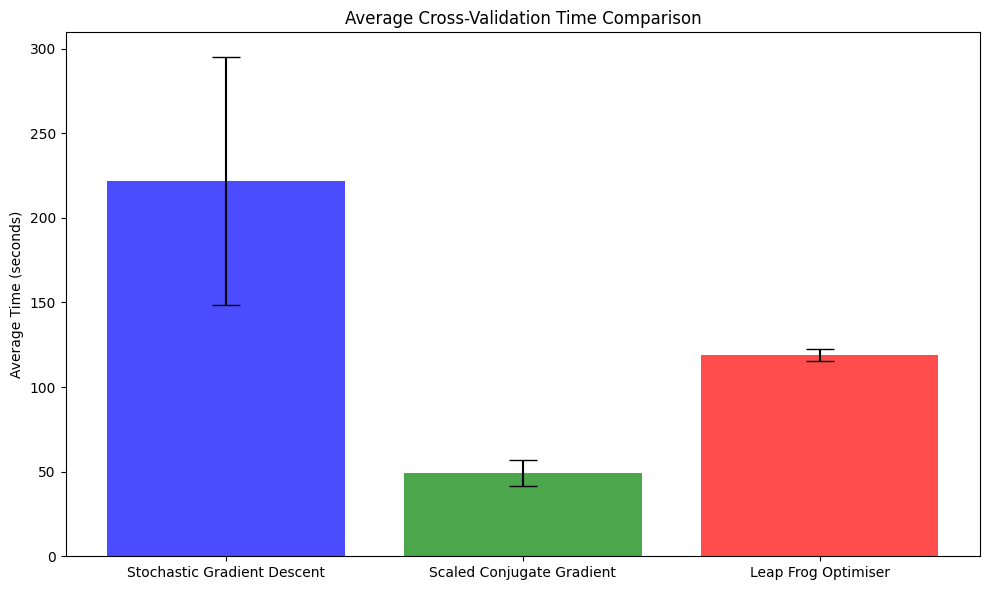

In [74]:
mean_times = [np.mean(times) for times in model_cv_times]
std_times = [np.std(times) for times in model_cv_times]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
x_pos = np.arange(len(model_names))

ax.bar(x_pos, mean_times, yerr=std_times, align='center', alpha=0.7, capsize=10, color=['blue', 'green', 'red'])
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names)
ax.set_ylabel('Average Time (seconds)')
ax.set_title('Average Cross-Validation Time Comparison')
# ax.yaxis.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [75]:
stat, p_value = kruskal(*model_cv_times)
print(f"Statistic: {stat}, p-value: {p_value}")

Statistic: 18.83870967741936, p-value: 8.113834974896836e-05



Paired T-Test Results:
Stochastic Gradient Descent vs Scaled Conjugate Gradient:
  t-statistic: -5.7590
  p-value: 0.0003
  Significant difference detected (p < 0.05)

Stochastic Gradient Descent vs Leap Frog Optimiser:
  t-statistic: -1.7261
  p-value: 0.1184
  No significant difference detected (p >= 0.05)

Scaled Conjugate Gradient vs Leap Frog Optimiser:
  t-statistic: 5.2775
  p-value: 0.0005
  Significant difference detected (p < 0.05)



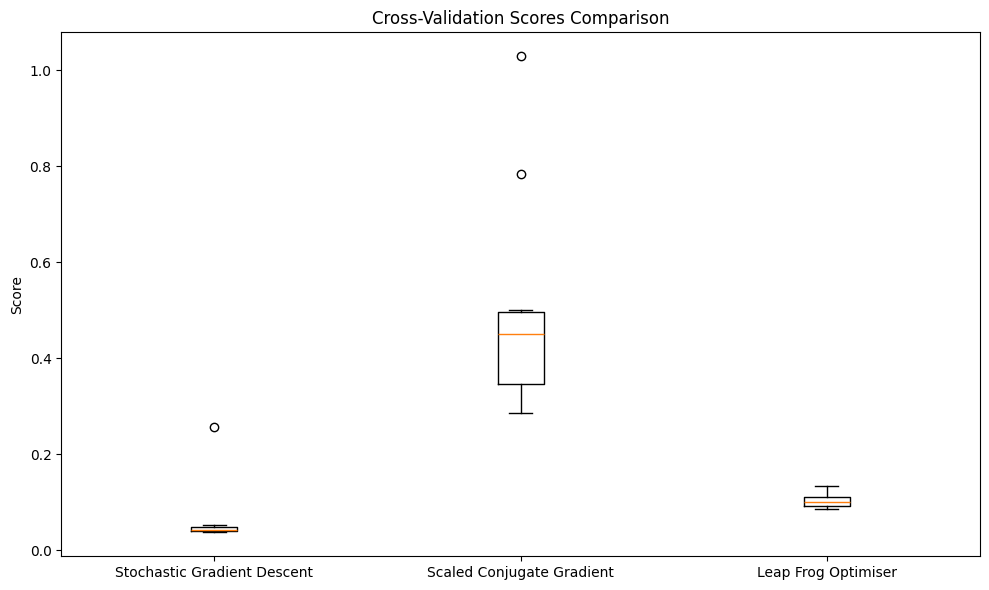

In [76]:
import numpy as np
from scipy import stats

def perform_paired_ttests(model_cv_scores, model_names):
    n_models = len(model_names)
    results = []

    for i in range(n_models):
        for j in range(i+1, n_models):
            t_statistic, p_value = stats.ttest_rel(model_cv_scores[i], model_cv_scores[j])
            results.append({
                'model1': model_names[i],
                'model2': model_names[j],
                't_statistic': t_statistic,
                'p_value': p_value
            })
    
    return results

# Perform paired t-tests
ttest_results = perform_paired_ttests(model_cv_scores, model_names)

# Print results
print("\nPaired T-Test Results:")
for result in ttest_results:
    print(f"{result['model1']} vs {result['model2']}:")
    print(f"  t-statistic: {result['t_statistic']:.4f}")
    print(f"  p-value: {result['p_value']:.4f}")
    if result['p_value'] < 0.05:
        print("  Significant difference detected (p < 0.05)")
    else:
        print("  No significant difference detected (p >= 0.05)")
    print()

# Visualize results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i, (name, scores) in enumerate(zip(model_names, model_cv_scores)):
    plt.boxplot(scores, positions=[i], labels=[name])

plt.title("Cross-Validation Scores Comparison")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

In [77]:
x_train, y_train = generate_logistic_regression_data(10000, seed=10000)
x_val, y_val = generate_logistic_regression_data(2000, seed=10001)
x_test, y_test = generate_logistic_regression_data(2000, seed=10002)
x_train, y_train = reshape_data(x_train, y_train)
x_val, y_val = reshape_data(x_val, y_val)
x_test, y_test = reshape_data(x_test, y_test)

In [78]:
best_log_sgd_model.fit(x_train, y_train, x_val, y_val)
best_log_scg_model.fit(x_train, y_train, x_val, y_val)
best_log_lf_model.fit(x_train, y_train, x_val, y_val)

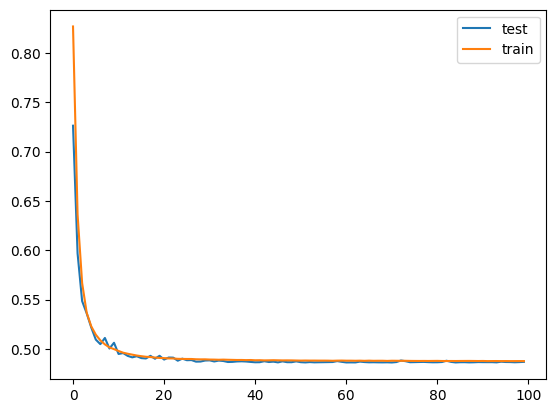

In [79]:
plt.figure()

plt.plot(np.asarray(best_log_sgd_model.validation_error))
plt.plot(np.asarray(best_log_sgd_model.training_error))

plt.legend(['test', 'train'])
plt.show()

In [80]:
xseq = np.linspace(x_test.min()-1e-02, x_test.max()+1e-02, 100)
yseq = best_log_sgd_model.predict(xseq.reshape(-1,1))

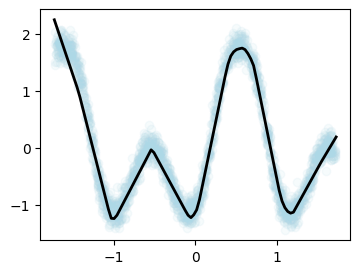

In [81]:
plt.figure(figsize=(4,3))
plt.scatter(x_test,y_test,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

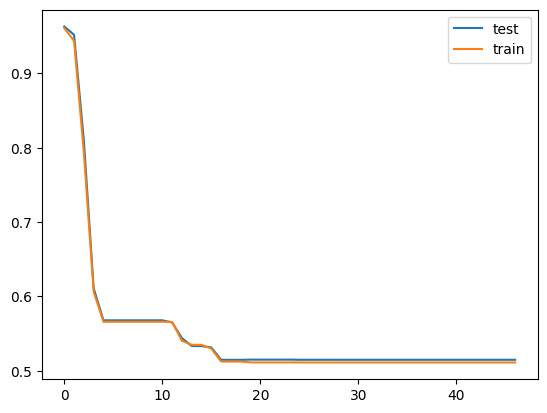

In [82]:
plt.figure()

plt.plot(np.asarray(best_log_scg_model.validation_error))
plt.plot(np.asarray(best_log_scg_model.training_error))

plt.legend(['test', 'train'])
plt.show()

In [83]:
xseq = np.linspace(x_test.min()-1e-02, x_test.max()+1e-02, 100)
yseq = best_log_scg_model.predict(xseq.reshape(-1,1))

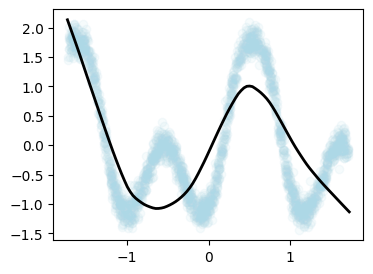

In [84]:
plt.figure(figsize=(4,3))
plt.scatter(x_test,y_test,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

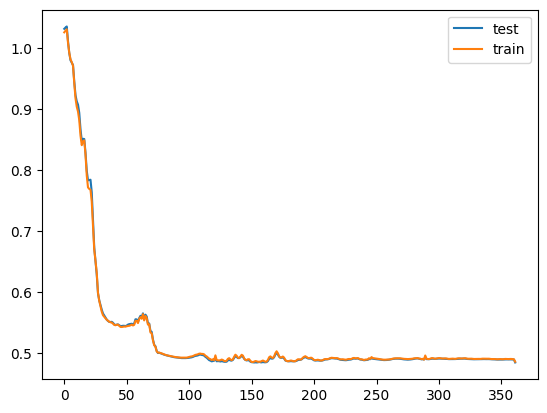

In [85]:
plt.figure()

plt.plot(np.asarray(best_log_lf_model.validation_error))
plt.plot(np.asarray(best_log_lf_model.training_error))

plt.legend(['test', 'train'])
plt.show()

In [86]:
xseq = np.linspace(x_test.min()-1e-02, x_test.max()+1e-02, 100)
yseq = best_log_lf_model.predict(xseq.reshape(-1,1))

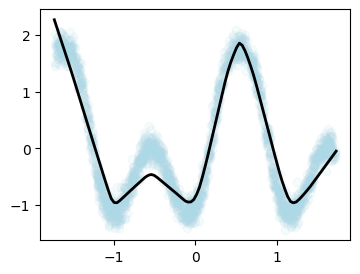

In [87]:
plt.figure(figsize=(4,3))
plt.scatter(x_test,y_test,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()